In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from datetime import date, datetime
from sklearn.cluster import KMeans

In [2]:
# Define variáveis
path_csv = Path('/Users/wesleyalmeida/GitHub/ribon-parquet')
#csv_eventFile = 'events_per_user_2019_10_27.csv'
csv_usersFile = 'ribon_users_features_2019-10-27.csv'

In [3]:
# Carrega dataframe de users
users = pd.read_csv(path_csv/csv_usersFile, parse_dates=['firstAccess', 'lastAccess'])
print(users.shape)
users.info(),
users.head()

(160870, 94)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160870 entries, 0 to 160869
Data columns (total 94 columns):
userId                                    160870 non-null int64
deviceModel                               160870 non-null object
countryISO                                160870 non-null object
firstAccess                               160870 non-null datetime64[ns]
lastAccess                                160870 non-null datetime64[ns]
calendarDays                              160870 non-null int64
activeDays                                160870 non-null int64
halfLifeActivityDays                      160870 non-null int64
donationTotal                             160870 non-null float64
averageDonationEventActiveDay             160870 non-null float64
averageDonationEventCalendarDay           160870 non-null float64
halfLifeDonation                          160870 non-null int64
averageDaysBetweenDonationEvents          90767 non-null float64
daysSinceLastDona

userId        deviceModel countryISO firstAccess lastAccess  calendarDays  \
0       1    Galaxy J5 Prime         BR  2017-11-07 2019-10-27           720   
1       2       Galaxy Note8         BR  2017-10-05 2019-10-20           746   
2       3              Mi A2         BR  2017-10-06 2019-10-23           748   
3       4  Galaxy Note 3 LTE         BR  2017-10-04 2019-05-20           594   
4       5       Moto G4 Plus         BR  2017-11-10 2019-05-22           559   

   activeDays  halfLifeActivityDays  donationTotal  \
0           6                   717           17.0   
1         193                   289          258.0   
2         162                   372          102.0   
3          49                    73           42.0   
4          32                   183           43.0   

   averageDonationEventActiveDay  ...  ClickedShareBadge  ReceiveBadgeButton  \
0                       2.833333  ...                0.0                 3.0   
1                       1.336788  ...                0.0                 7.0   
2                       0.629630  ...                1.0                 5.0   
3                       0.857143  ...                0.0                 0.0   
4                       1.343750  ...                0.0                 2.0   

   ReceiveBadgeClose  ClickedInviteFriendsBadgeScreen  ClickedToSeeReward  \
0                2.0                              0.0                 4.0   
1               13.0                              0.0                 0.0   
2                9.0                              0.0                 4.0   
3                0.0                              0.0                 0.0   
4                2.0                              0.0                 0.0   

   OpenedAdOnFeedView  ClickedBadgesUnupdated  ClickedShareFeed  \
0                 0.0                     0.0               0.0   
1                 0.0                     0.0               0.0   
2                 0.0                     0.0               0.0   
3                 0.0                     0.0               0.0   
4                 0.0                     0.0               0.0   

   ClickedShareFeedView  OpenedProfileInfo  
0                   5.0                0.0  
1                   0.0                0.0  
2                   0.0                7.0  
3                   0.0                0.0  
4                   0.0                0.0  

[5 rows x 94 columns]

In [5]:
users.columns.tolist()[6:22]

['activeDays',
 'halfLifeActivityDays',
 'donationTotal',
 'averageDonationEventActiveDay',
 'averageDonationEventCalendarDay',
 'halfLifeDonation',
 'averageDaysBetweenDonationEvents',
 'daysSinceLastDonationEvent',
 'ClickedCollectFeedTotal',
 'halfLifeClickedCollectFeed',
 'averageDaysBetweenClickedCollectFeed',
 'daysSinceLastEventsClickedCollectFeed',
 'ClickedCollectBonusTotal',
 'halfLifeClickedCollectBonus',
 'averageDaysBetweenClickedCollectBonus',
 'daysSinceLastEventsClickedCollectBonus']

In [11]:
features = users.columns.tolist()[6:22]
len(features),features

(89,
 ['calendarDays',
  'activeDays',
  'halfLifeActivityDays',
  'donationTotal',
  'averageDonationEventActiveDay',
  'averageDonationEventCalendarDay',
  'halfLifeDonation',
  'averageDaysBetweenDonationEvents',
  'daysSinceLastDonationEvent',
  'ClickedCollectFeedTotal',
  'halfLifeClickedCollectFeed',
  'averageDaysBetweenClickedCollectFeed',
  'daysSinceLastEventsClickedCollectFeed',
  'ClickedCollectBonusTotal',
  'halfLifeClickedCollectBonus',
  'averageDaysBetweenClickedCollectBonus',
  'daysSinceLastEventsClickedCollectBonus',
  'openCurtain',
  'openFeed',
  'openDonationModalFromNgo',
  'openDonationModalFromProfile',
  'openSettingsMenu',
  'openNgoInfo',
  'selectImpact',
  'openImpactReport',
  'brandShowBeforeDonate',
  'brandShowAfterDonate',
  'openSupport',
  'openTutorialFromSupport',
  'openFaqFromSupport',
  'openFaqFromSettings',
  'referrer',
  'clickInviteFriends',
  'openProfile',
  'openAdvertise',
  'openNgoOnProfile',
  'brandShowOnFeed',
  'OpenedNotifica

In [12]:
df = users.copy()
df.shape

(45953, 95)

In [13]:
samples = np.array(df[features])
samples.shape

(45953, 89)

### Cluster com StandardScaler

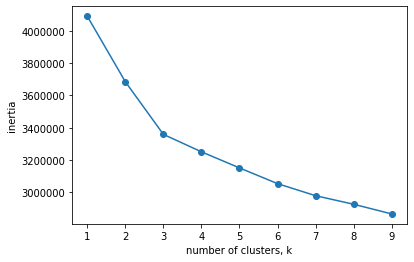

In [14]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

ks = range(1, 10)
inertias = []

for k in ks:
    # Create scaler: scaler
    scaler = StandardScaler()
    
    # Create a KMeans instance with k clusters: model
    kmeans = KMeans(n_clusters=k)
    
    # Create pipeline: pipeline
    pipeline = make_pipeline(scaler, kmeans)
    
    # Fit the pipeline to samples
    pipeline.fit(samples)
    
    # Append the inertia to the list of inertias
    inertias.append(kmeans.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

Automatically created module for IPython interactive environment
For n_clusters = 3 The average silhouette_score is : 0.47527243610253
For n_clusters = 4 The average silhouette_score is : 0.45374526589647446
For n_clusters = 5 The average silhouette_score is : 0.38564422317846386
For n_clusters = 6 The average silhouette_score is : 0.37996065163212717


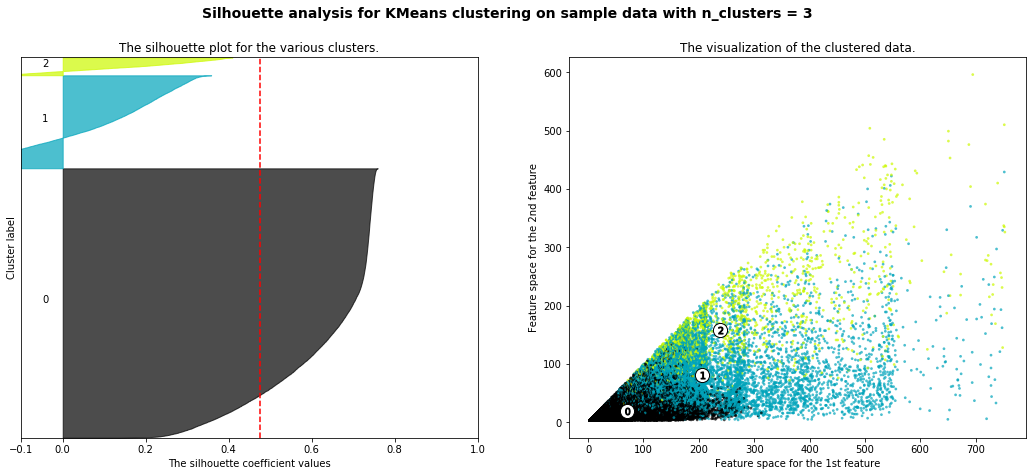

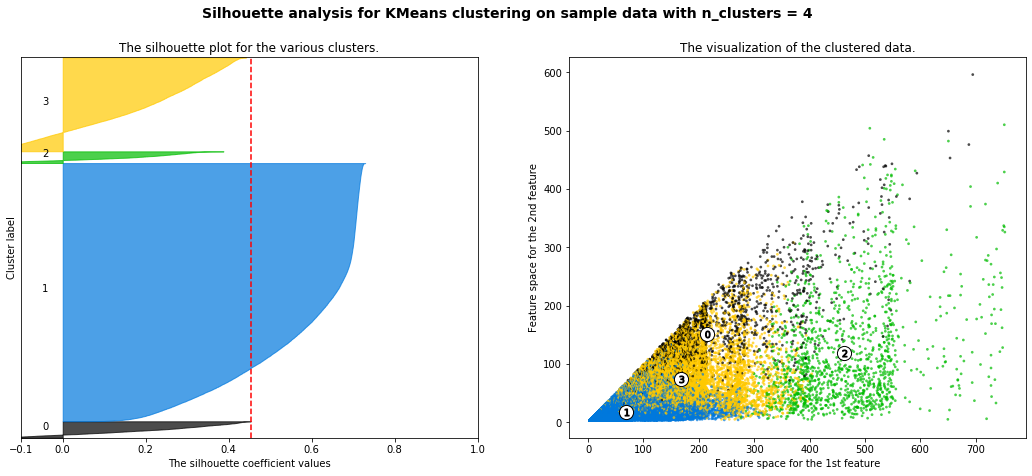

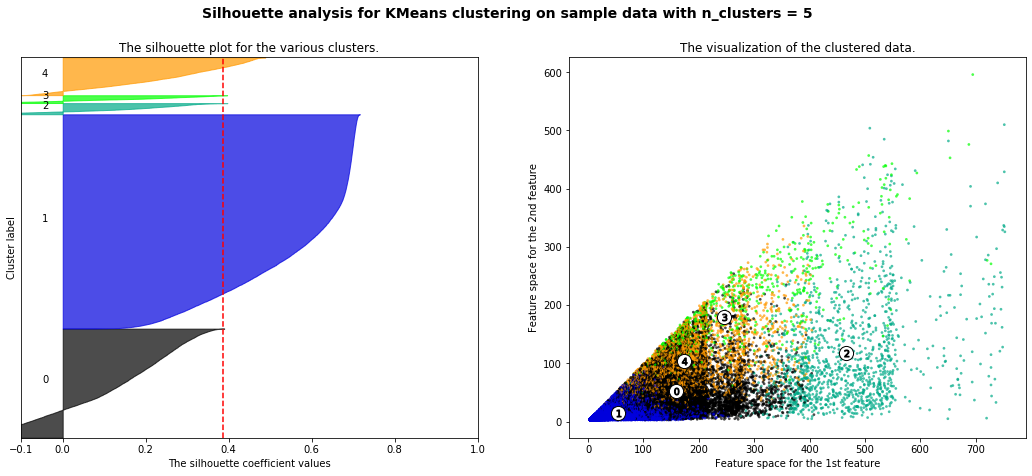

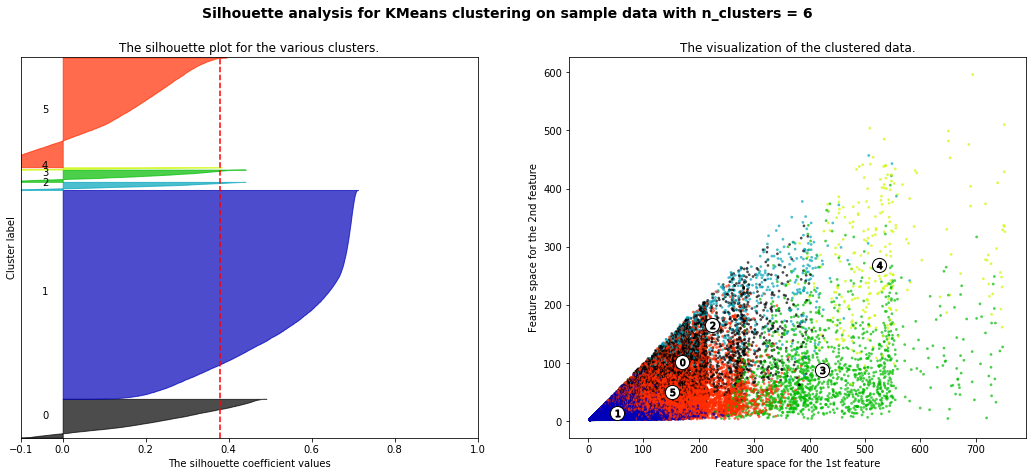

In [16]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X = samples

range_n_clusters = [3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [17]:
#########################
#### depois usar
#########################
nc = 4
# Create scaler: scaler
scaler = StandardScaler()

# Create KMeans instance: kmeans
kmeans = KMeans(n_clusters=nc)

# Create pipeline: pipeline
pipeline = make_pipeline(scaler, kmeans)

# Fit the pipeline to samples
pipeline.fit(samples)

# Calculate the cluster labels: labels
labels = pipeline.predict(samples)

#l = pd.DataFrame(labels).groupby(0).size()
l = pd.DataFrame(labels)
pd.concat([l.groupby(0).size(), l.groupby(0).size().agg(lambda x: x / len(l))], axis=1)

0         1
0                 
0  31431  0.683981
1   5157  0.112223
2    740  0.016103
3   8625  0.187692

In [33]:
#########################
#### depois usar
#########################
nc = 5
# Create scaler: scaler
scaler = StandardScaler()

# Create KMeans instance: kmeans
kmeans = KMeans(n_clusters=nc)

# Create pipeline: pipeline
pipeline = make_pipeline(scaler, kmeans)

# Fit the pipeline to samples
pipeline.fit(samples)

# Calculate the cluster labels: labels
labels = pipeline.predict(samples)

#l = pd.DataFrame(labels).groupby(0).size()
l = pd.DataFrame(labels)
pd.concat([l.groupby(0).size(), l.groupby(0).size().agg(lambda x: x / len(l))], axis=1)

0         1
0                 
0  20522  0.446587
1  12924  0.281244
2   1724  0.037517
3   2334  0.050791
4   8449  0.183862

In [18]:
len(labels), df.shape

(45953, (45953, 95))

In [19]:
y = labels
X = samples

# Split data into 80% train and 20% test
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= SEED)

In [20]:
# Split data into 80% train and 20% test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)

In [46]:
# Define the dictionary 'params_rf'
params_rf = {
    'n_estimators': [200, 300, 400, 500],
    'max_features': ['log2', 'auto', 'sqrt'],
    'min_samples_leaf': [2, 3, 5],
    'max_depth': [6, 7, 8, 9, 10],
    'criterion' :['gini', 'entropy']
}

In [47]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [48]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Instantiate grid_rf
grid_rf = GridSearchCV(estimator=rf,
                       param_grid=params_rf,
                       scoring='neg_mean_squared_error',
                       cv=5,
                       verbose=1,
                       n_jobs=-1)

In [49]:
#grid_rf.fit(X_train, y_train)
#CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
grid_rf.fit(X_train, y_train)

Fitting 5 folds for each of 360 candidates, totalling 1800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
exception calling callback for <Future at 0x11b06ad30 state=finished raised TerminatedWorkerError>
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/joblib/externals/loky/_base.py", line 625, in _invoke_callbacks
    callback(self)
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/joblib/parallel.py", line 309, in __call__
    self.parallel.dispatch_next()
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/joblib/parallel.py", line 731, in dispatch_next
    if not self.dispatch_one_batch(self._original_iterator):
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/joblib/parallel.py", line 759, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/joblib/paral

TerminatedWorkerError: A worker process managed by the executor was unexpectedly terminated. This could be caused by a segmentation fault while calling the function or by an excessive memory usage causing the Operating System to kill the worker. The exit codes of the workers are {SIGABRT(-6), SIGABRT(-6)}

In [25]:
grid_rf.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'n_estimators': 300}

In [26]:
clf = RandomForestClassifier(criterion = 'entropy', n_estimators=300, max_depth=10, max_features= 'auto', min_samples_leaf= 2)

In [27]:
clf.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=10, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [28]:
y_pred = clf.predict(X_test)

In [29]:
# Import mean_squared_error as MSE
from sklearn.metrics import mean_squared_error as MSE

# Evaluate the test set RMSE
rmse_test = MSE(y_test, y_pred) ** (1/2)

# Print rmse_test
print('Test set RMSE of rf: {:.2f}'.format(rmse_test))

Test set RMSE of rf: 0.43


In [30]:
# Import necessary modules
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))

[[6261    2    0   44]
 [  93  913    0   10]
 [   0    0  139    0]
 [ 131    4    0 1594]]


In [31]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      6307
           1       0.99      0.90      0.94      1016
           2       1.00      1.00      1.00       139
           3       0.97      0.92      0.94      1729

    accuracy                           0.97      9191
   macro avg       0.98      0.95      0.97      9191
weighted avg       0.97      0.97      0.97      9191



In [32]:
clf.feature_importances_

array([5.40953680e-02, 7.76155036e-02, 4.32283333e-02, 4.81175491e-02,
       3.62652543e-03, 1.69249470e-02, 2.28831589e-02, 4.17508345e-02,
       3.09298197e-02, 4.43961260e-02, 3.93348358e-02, 5.15452301e-02,
       3.20796671e-02, 7.17840175e-02, 3.44067177e-02, 4.83615833e-02,
       4.63488545e-02, 9.34418760e-03, 5.38568359e-03, 1.84224197e-04,
       1.06811758e-02, 1.44229996e-03, 7.06522761e-05, 2.30515021e-03,
       3.45963879e-03, 1.14506309e-02, 6.80605484e-03, 2.50658966e-03,
       1.05398276e-04, 5.43816914e-04, 1.34177596e-03, 9.12171263e-05,
       2.73070466e-03, 9.47188331e-03, 2.73662320e-05, 4.43091262e-04,
       7.34833858e-03, 2.48650078e-03, 2.82524773e-03, 2.19297929e-03,
       3.58687504e-03, 1.26762632e-03, 3.84341184e-04, 2.56146225e-04,
       1.66340379e-02, 5.84634660e-02, 9.93208290e-04, 1.79400950e-03,
       5.04889965e-04, 1.64472834e-04, 3.71091464e-02, 1.12584954e-03,
       2.06218815e-03, 1.41436510e-04, 2.72207604e-04, 1.00194856e-03,
      

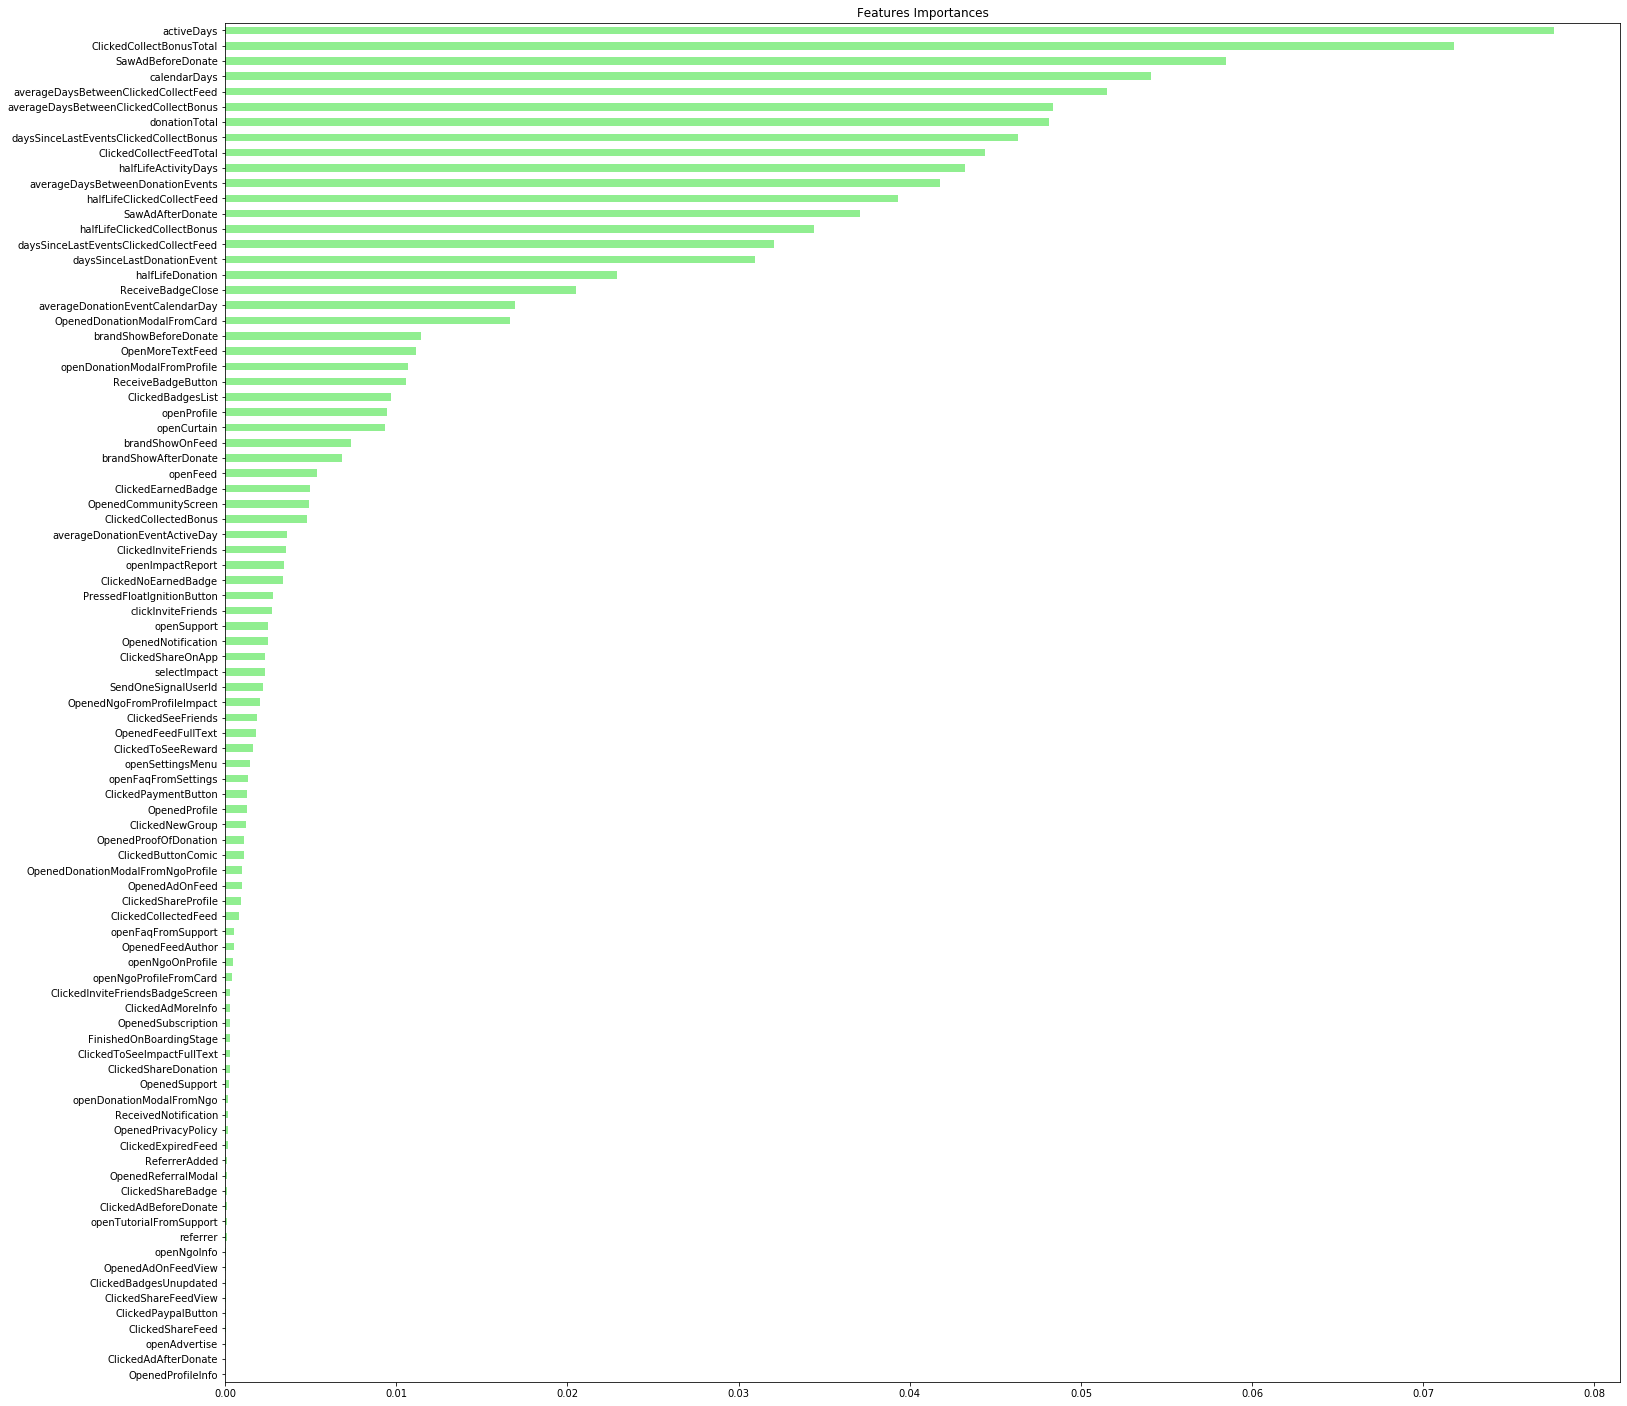

In [34]:
_ = plt.figure(figsize=[25,25])

# Create a pd.Series of features importances
importances = pd.Series(data=clf.feature_importances_,
                        index= features)

# Sort importances
importances_sorted = importances.sort_values()

# Draw a horizontal barplot of importances_sorted
importances_sorted.plot(kind='barh', color='lightgreen')
plt.title('Features Importances')
plt.show()

In [45]:
importances_sorted.sort_values(ascending=False)[:52]

activeDays                                0.077616
ClickedCollectBonusTotal                  0.071784
SawAdBeforeDonate                         0.058463
calendarDays                              0.054095
averageDaysBetweenClickedCollectFeed      0.051545
averageDaysBetweenClickedCollectBonus     0.048362
donationTotal                             0.048118
daysSinceLastEventsClickedCollectBonus    0.046349
ClickedCollectFeedTotal                   0.044396
halfLifeActivityDays                      0.043228
averageDaysBetweenDonationEvents          0.041751
halfLifeClickedCollectFeed                0.039335
SawAdAfterDonate                          0.037109
halfLifeClickedCollectBonus               0.034407
daysSinceLastEventsClickedCollectFeed     0.032080
daysSinceLastDonationEvent                0.030930
halfLifeDonation                          0.022883
ReceiveBadgeClose                         0.020475
averageDonationEventCalendarDay           0.016925
OpenedDonationModalFromCard    

In [56]:
ufinal = pd.concat([pd.DataFrame(labels).reset_index(drop=True),df.reset_index(drop=False)], axis=1)
ufinal.rename(columns={0: "cluster"}, inplace=True)
ufinal.head()

cluster            deviceModel countryISO firstAccess lastAccess  \
0        0        Galaxy J5 Prime         BR  2017-11-07 2019-10-27   
1        0           Galaxy Note8         BR  2017-10-05 2019-10-20   
2        0                  Mi A2         BR  2017-10-06 2019-10-23   
3        0  Moto G Plus (5th Gen)         BR  2017-10-11 2019-08-09   
4        0              Galaxy S8         BR  2017-10-04 2019-10-25   

   calendarDays  activeDays  halfLifeActivityDays  donationTotal  \
0           720           6                   717           17.0   
1           746         193                   289          258.0   
2           748         162                   372          102.0   
3           668          73                   248           78.0   
4           752         335                   310          246.0   

   averageDonationEventActiveDay  ...  ClickedShareBadge  ReceiveBadgeButton  \
0                       2.833333  ...                0.0                 3.0   
1                       1.336788  ...                0.0                 7.0   
2                       0.629630  ...                1.0                 5.0   
3                       1.068493  ...                1.0                 5.0   
4                       0.734328  ...                0.0                12.0   

   ReceiveBadgeClose  ClickedInviteFriendsBadgeScreen  ClickedToSeeReward  \
0                2.0                              0.0                 4.0   
1               13.0                              0.0                 0.0   
2                9.0                              0.0                 4.0   
3                5.0                              0.0                 2.0   
4               14.0                              0.0                 7.0   

   OpenedAdOnFeedView  ClickedBadgesUnupdated  ClickedShareFeed  \
0                 0.0                     0.0               0.0   
1                 0.0                     0.0               0.0   
2                 0.0                     0.0               0.0   
3                 0.0                     0.0               0.0   
4                 0.0                     0.0               0.0   

   ClickedShareFeedView  OpenedProfileInfo  
0                   5.0                0.0  
1                   0.0                0.0  
2                   0.0                7.0  
3                   0.0                0.0  
4                   0.0                0.0  

[5 rows x 94 columns]

In [69]:
for a in importances.sort_values(ascending=False).index:
    print(a)

halfLifeActivityDays
ClickedCollectFeedTotal
halfLifeClickedCollectFeed
activeDays
calendarDays
halfLifeClickedCollectBonus
ClickedCollectBonusTotal
daysSinceLastEventsClickedCollectBonus
averageDaysBetweenClickedCollectFeed
daysSinceLastDonationEvent
averageDaysBetweenClickedCollectBonus
halfLifeDonation
daysSinceLastEventsClickedCollectFeed
averageDaysBetweenDonationEvents
donationTotal
averageDonationEventCalendarDay
averageDonationEventActiveDay


In [71]:
#l = pd.DataFrame(labels).groupby(0).size()
l = pd.DataFrame(labels)
pd.concat([l.groupby(0).size(), l.groupby(0).size().agg(lambda x: x / len(l))], axis=1)

0         1
0                 
0   1746  0.037995
1  28633  0.623093
2   4697  0.102213
3  10877  0.236698

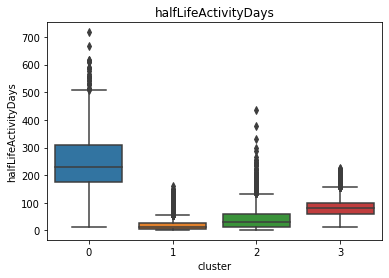

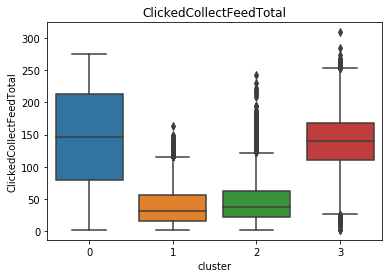

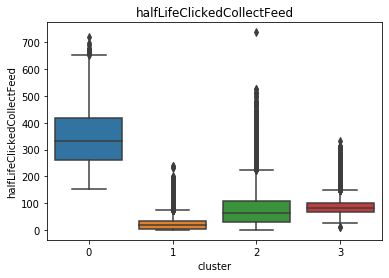

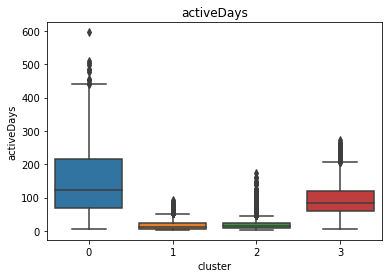

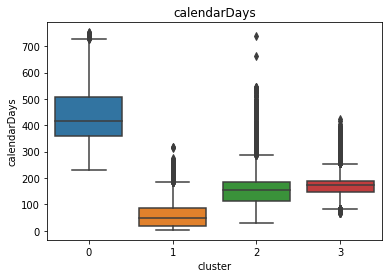

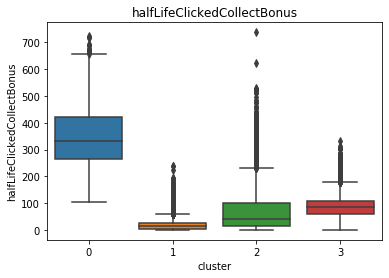

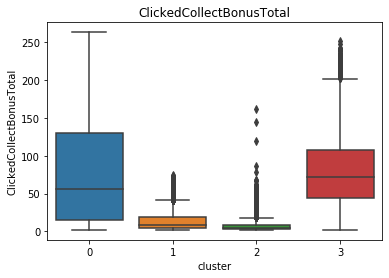

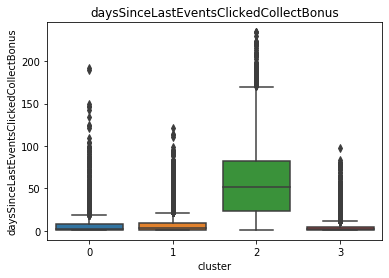

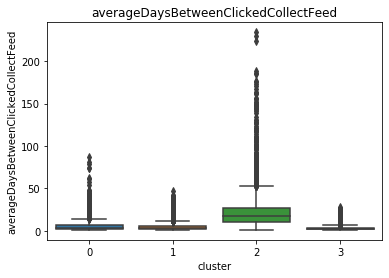

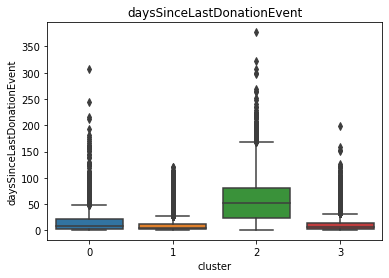

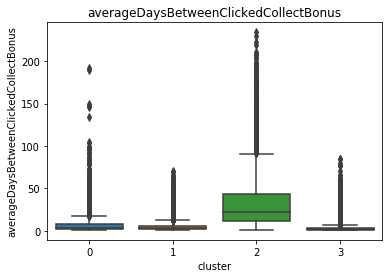

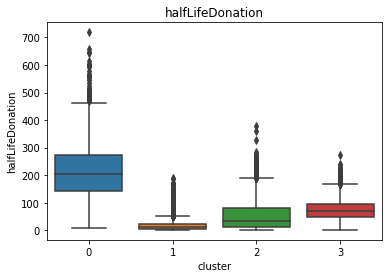

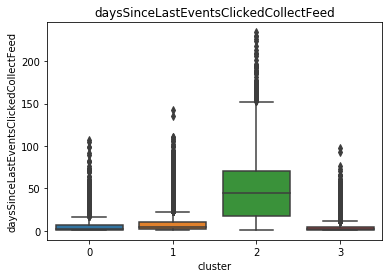

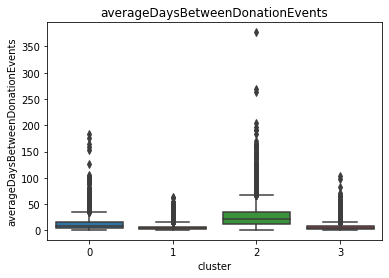

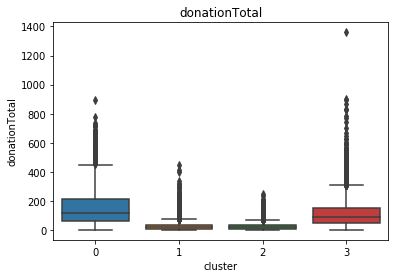

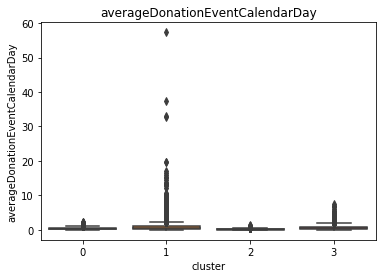

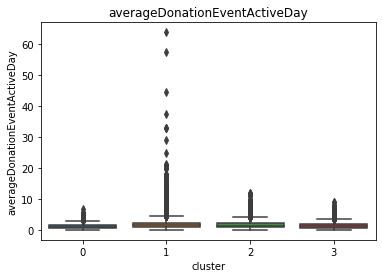

In [70]:
for f in importances.sort_values(ascending=False).index:
    # Create box plot with Seaborn's default settings
    _ = sns.boxplot(x='cluster', y=f, data=ufinal)
    
    # Label the axes
    _ = plt.xlabel('cluster')
    _ = plt.title(f)
    
    # Show the plot
    plt.show()

In [83]:
# Function to compute the ECDF
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n + 1) / n
    
    return x, y

# Specify array of percentiles: percentiles
percentiles = [2.5, 25, 50, 75, 97.5]

In [85]:
f = 'activeDays'
c = 0

In [79]:
ufinal[ufinal.cluster == 1][f]

45       10
201      23
653      32
803       8
856      13
         ..
45948     3
45949     3
45950     3
45951     3
45952     3
Name: activeDays, Length: 28633, dtype: int64

count    1746.000000
mean      147.660939
std       100.405982
min         5.000000
25%        68.000000
50%       123.000000
75%       217.000000
max       596.000000
Name: activeDays, dtype: float64


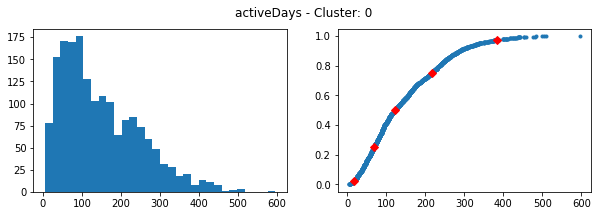

In [89]:
dados = ufinal[ufinal.cluster == c][f]

# Generate subplot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,3))
_ = fig.suptitle(f + ' - Cluster: ' + str(c))

# Plot histogram
_ = ax1.hist(dados, bins=30)

# Compute ECDF for versicolor data: x_vers, y_vers
x_vers, y_vers = ecdf(dados)

# Compute percentiles: ptiles_vers
ptiles_vers = np.percentile(dados, percentiles)

# Plot the ECDF
_ = ax2.plot(x_vers, y_vers, '.')

# Overlay percentiles as red diamonds.
ptiles = [x/100 for x in percentiles]
_ = ax2.plot(ptiles_vers, ptiles, marker='D', color='red', linestyle='none')

print(dados.describe())

count    1746.000000
mean      246.060137
std       104.858515
min        14.000000
25%       176.000000
50%       229.500000
75%       308.750000
max       717.000000
Name: halfLifeActivityDays, dtype: float64


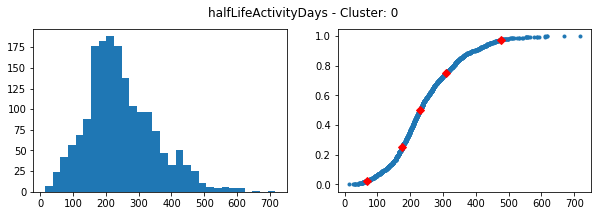

count    28633.000000
mean        18.467572
std         17.469790
min          2.000000
25%          6.000000
50%         13.000000
75%         26.000000
max        160.000000
Name: halfLifeActivityDays, dtype: float64


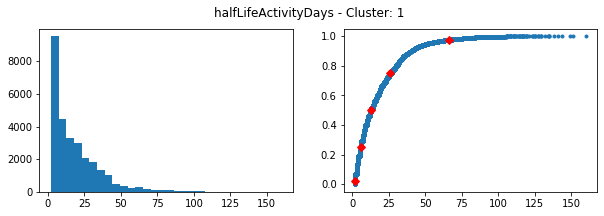

count    4697.000000
mean       42.933575
std        41.067763
min         2.000000
25%        13.000000
50%        29.000000
75%        61.000000
max       436.000000
Name: halfLifeActivityDays, dtype: float64


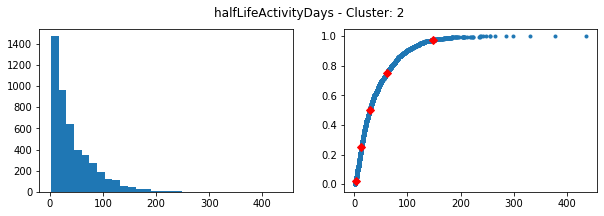

count    10877.000000
mean        83.061782
std         31.342712
min         12.000000
25%         60.000000
50%         80.000000
75%         99.000000
max        227.000000
Name: halfLifeActivityDays, dtype: float64


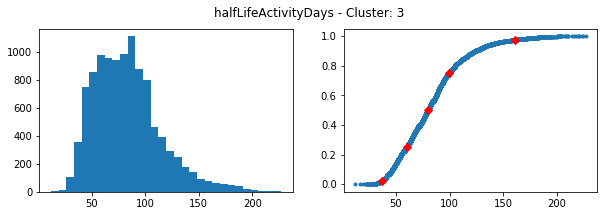

count    1746.000000
mean      144.494273
std        75.229873
min         2.000000
25%        80.250000
50%       147.000000
75%       213.000000
max       275.000000
Name: ClickedCollectFeedTotal, dtype: float64


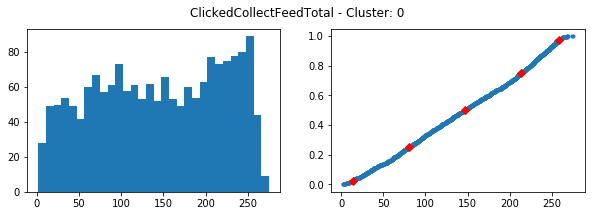

count    28633.000000
mean        38.644501
std         27.307307
min          2.000000
25%         16.000000
50%         32.000000
75%         56.000000
max        163.000000
Name: ClickedCollectFeedTotal, dtype: float64


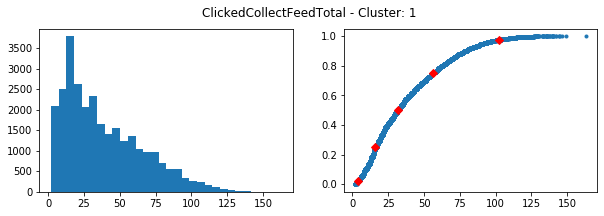

count    4697.000000
mean       46.147967
std        33.189451
min         2.000000
25%        22.000000
50%        38.000000
75%        62.000000
max       242.000000
Name: ClickedCollectFeedTotal, dtype: float64


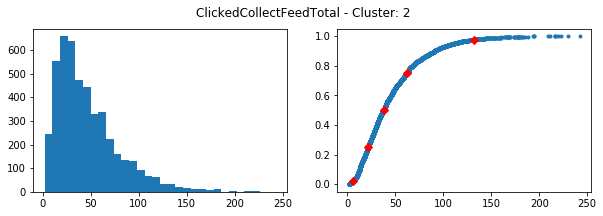

count    10877.000000
mean       140.804450
std         41.187375
min          2.000000
25%        111.000000
50%        140.000000
75%        168.000000
max        309.000000
Name: ClickedCollectFeedTotal, dtype: float64


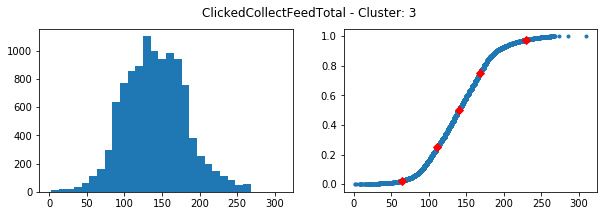

count    1746.000000
mean      344.058419
std       106.332802
min       153.000000
25%       261.000000
50%       331.000000
75%       417.000000
max       719.000000
Name: halfLifeClickedCollectFeed, dtype: float64


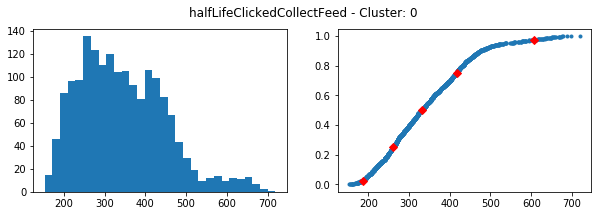

count    28633.000000
mean        24.355080
std         24.005179
min          1.000000
25%          6.000000
50%         18.000000
75%         34.000000
max        240.000000
Name: halfLifeClickedCollectFeed, dtype: float64


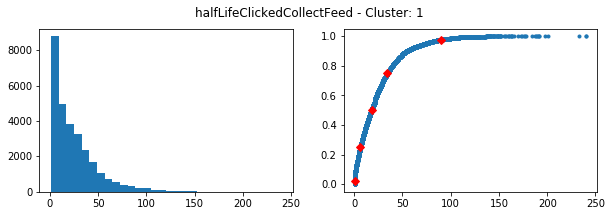

count    4697.000000
mean       83.484990
std        78.617861
min         1.000000
25%        29.000000
50%        63.000000
75%       107.000000
max       737.000000
Name: halfLifeClickedCollectFeed, dtype: float64


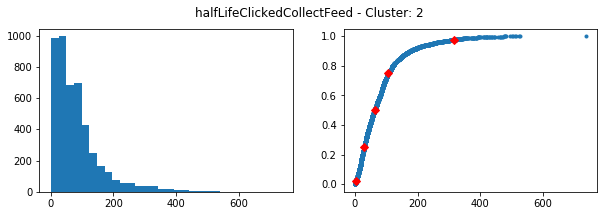

count    10877.000000
mean        90.529006
std         35.694211
min         10.000000
25%         69.000000
50%         84.000000
75%        101.000000
max        333.000000
Name: halfLifeClickedCollectFeed, dtype: float64


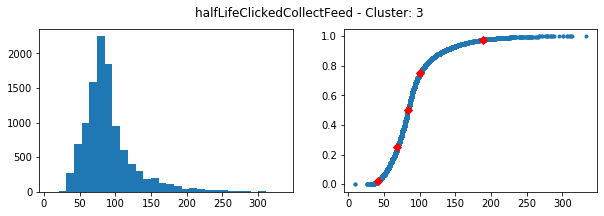

count    1746.000000
mean      147.660939
std       100.405982
min         5.000000
25%        68.000000
50%       123.000000
75%       217.000000
max       596.000000
Name: activeDays, dtype: float64


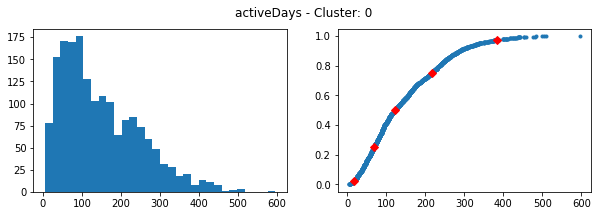

count    28633.000000
mean        18.172982
std         14.296471
min          3.000000
25%          7.000000
50%         13.000000
75%         25.000000
max         94.000000
Name: activeDays, dtype: float64


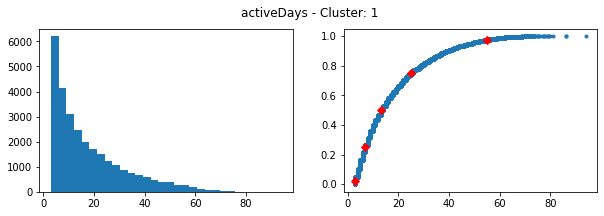

count    4697.000000
mean       19.177560
std        17.060806
min         3.000000
25%         9.000000
50%        14.000000
75%        24.000000
max       174.000000
Name: activeDays, dtype: float64


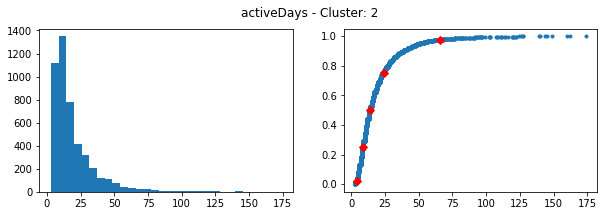

count    10877.000000
mean        91.802427
std         42.958982
min          6.000000
25%         60.000000
50%         84.000000
75%        119.000000
max        273.000000
Name: activeDays, dtype: float64


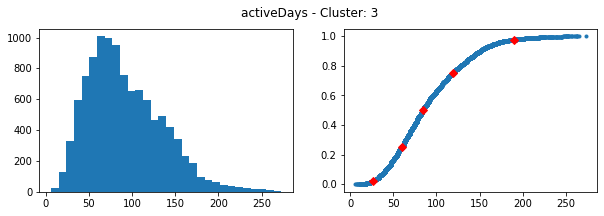

count    1746.000000
mean      435.209049
std       102.593355
min       230.000000
25%       359.250000
50%       416.000000
75%       507.000000
max       753.000000
Name: calendarDays, dtype: float64


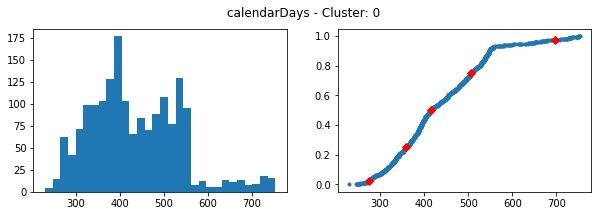

count    28633.000000
mean        58.625991
std         47.273300
min          3.000000
25%         19.000000
50%         48.000000
75%         85.000000
max        316.000000
Name: calendarDays, dtype: float64


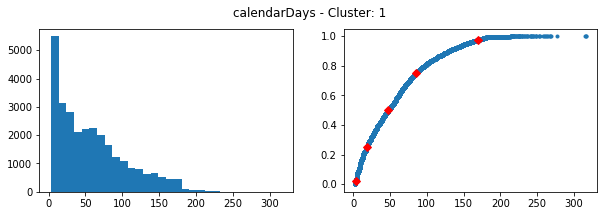

count    4697.000000
mean      164.319353
std        78.405662
min        29.000000
25%       114.000000
50%       153.000000
75%       183.000000
max       737.000000
Name: calendarDays, dtype: float64


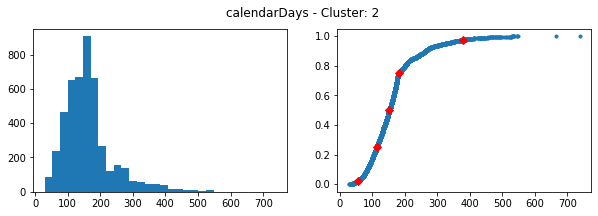

count    10877.000000
mean       174.665441
std         47.556692
min         66.000000
25%        147.000000
50%        174.000000
75%        190.000000
max        423.000000
Name: calendarDays, dtype: float64


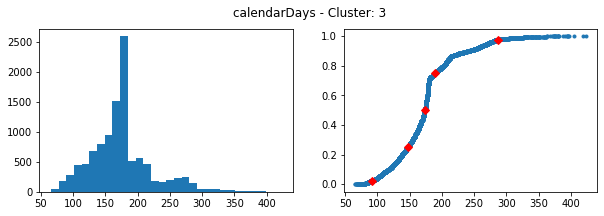

count    1746.000000
mean      348.630011
std       106.115893
min       104.000000
25%       265.000000
50%       332.000000
75%       421.750000
max       723.000000
Name: halfLifeClickedCollectBonus, dtype: float64


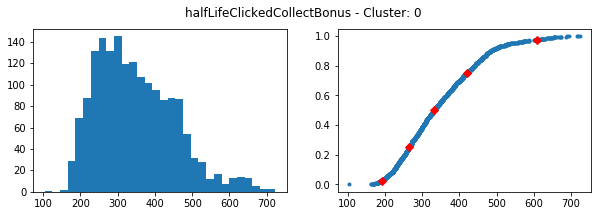

count    28633.000000
mean        20.744072
std         21.300492
min          1.000000
25%          6.000000
50%         14.000000
75%         28.000000
max        240.000000
Name: halfLifeClickedCollectBonus, dtype: float64


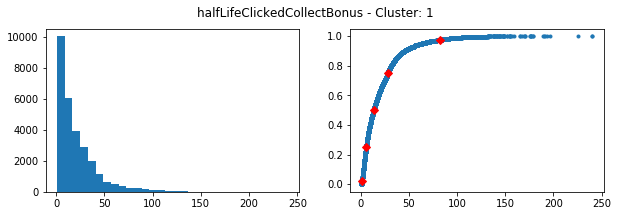

count    4697.000000
mean       71.640835
std        81.050389
min         1.000000
25%        14.000000
50%        42.000000
75%       101.000000
max       737.000000
Name: halfLifeClickedCollectBonus, dtype: float64


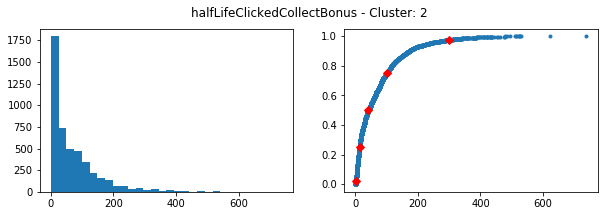

count    10877.000000
mean        90.849683
std         41.127775
min          2.000000
25%         62.000000
50%         85.000000
75%        109.000000
max        333.000000
Name: halfLifeClickedCollectBonus, dtype: float64


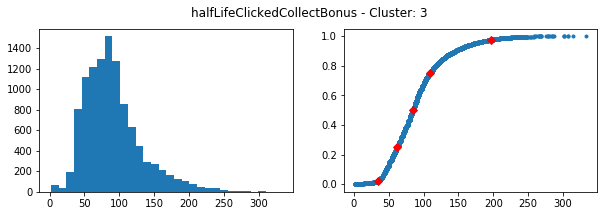

count    1746.000000
mean       77.541810
std        69.450539
min         2.000000
25%        15.250000
50%        55.500000
75%       130.000000
max       263.000000
Name: ClickedCollectBonusTotal, dtype: float64


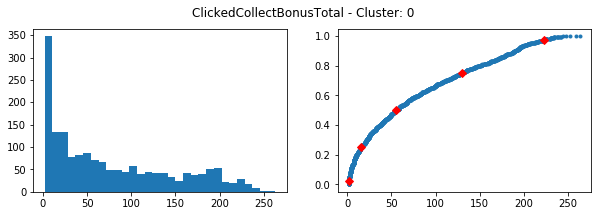

count    28633.000000
mean        13.396221
std         12.918036
min          2.000000
25%          4.000000
50%          8.000000
75%         19.000000
max         75.000000
Name: ClickedCollectBonusTotal, dtype: float64


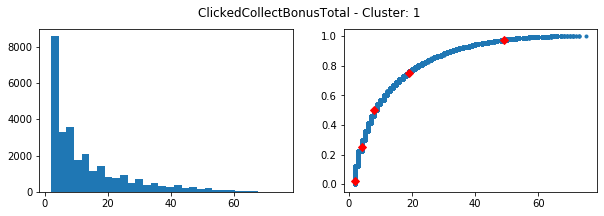

count    4697.000000
mean        7.556951
std         8.702457
min         2.000000
25%         3.000000
50%         5.000000
75%         9.000000
max       162.000000
Name: ClickedCollectBonusTotal, dtype: float64


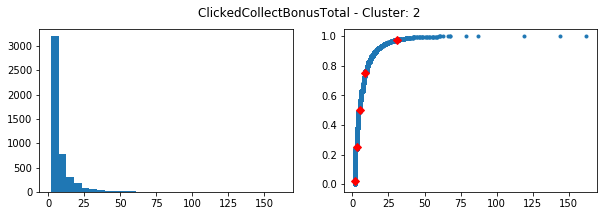

count    10877.000000
mean        77.643928
std         44.807286
min          2.000000
25%         44.000000
50%         72.000000
75%        107.000000
max        252.000000
Name: ClickedCollectBonusTotal, dtype: float64


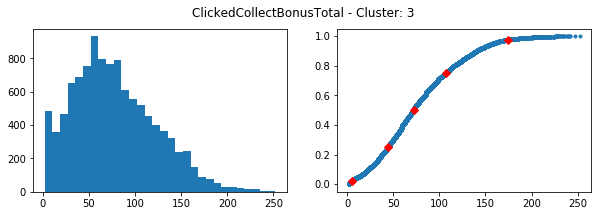

count    1746.000000
mean        9.557847
std        19.141917
min         1.000000
25%         1.000000
50%         2.000000
75%         8.000000
max       192.000000
Name: daysSinceLastEventsClickedCollectBonus, dtype: float64


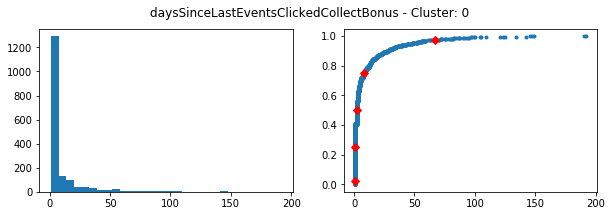

count    28633.000000
mean         7.777704
std         10.604297
min          1.000000
25%          1.000000
50%          3.000000
75%          9.000000
max        121.000000
Name: daysSinceLastEventsClickedCollectBonus, dtype: float64


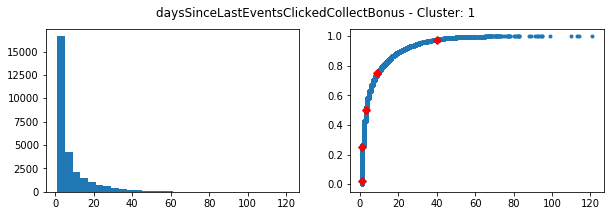

count    4697.000000
mean       57.862891
std        43.510479
min         1.000000
25%        23.000000
50%        52.000000
75%        82.000000
max       234.000000
Name: daysSinceLastEventsClickedCollectBonus, dtype: float64


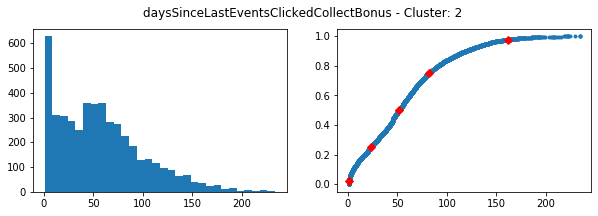

count    10877.000000
mean         5.320493
std          8.560081
min          1.000000
25%          1.000000
50%          2.000000
75%          5.000000
max         98.000000
Name: daysSinceLastEventsClickedCollectBonus, dtype: float64


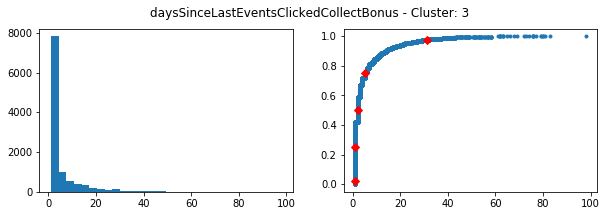

count    1746.000000
mean        5.987438
std         8.120796
min         1.000000
25%         1.720147
50%         3.006173
75%         6.696078
max        87.500000
Name: averageDaysBetweenClickedCollectFeed, dtype: float64


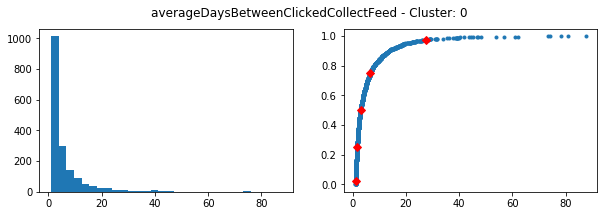

count    28633.000000
mean         4.505386
std          4.020786
min          1.000000
25%          1.857143
50%          3.000000
75%          5.750000
max         47.000000
Name: averageDaysBetweenClickedCollectFeed, dtype: float64


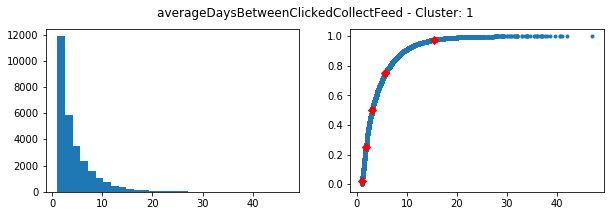

count    4697.000000
mean       22.553108
std        21.155896
min         1.000000
25%        10.272727
50%        16.833333
75%        27.166667
max       234.000000
Name: averageDaysBetweenClickedCollectFeed, dtype: float64


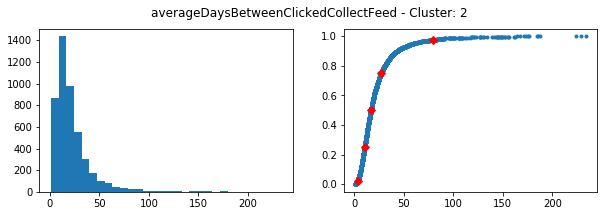

count    10877.000000
mean         2.965914
std          2.354842
min          1.000000
25%          1.560976
50%          2.135593
75%          3.431373
max         28.571429
Name: averageDaysBetweenClickedCollectFeed, dtype: float64


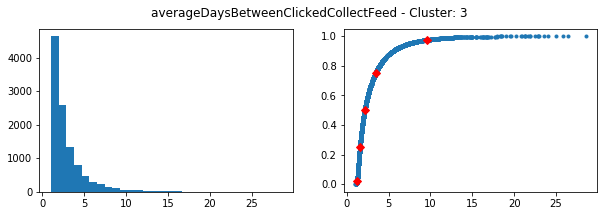

count    1746.000000
mean       17.904353
std        27.560229
min         1.000000
25%         3.000000
50%         8.000000
75%        21.000000
max       307.000000
Name: daysSinceLastDonationEvent, dtype: float64


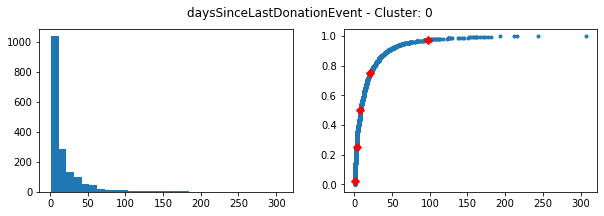

count    28633.000000
mean         9.607167
std         12.385417
min          1.000000
25%          2.000000
50%          5.000000
75%         12.000000
max        121.000000
Name: daysSinceLastDonationEvent, dtype: float64


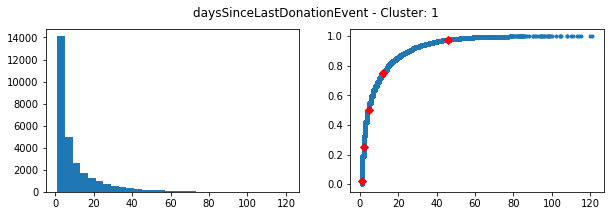

count    4697.000000
mean       58.307004
std        44.122403
min         1.000000
25%        23.000000
50%        52.000000
75%        81.000000
max       377.000000
Name: daysSinceLastDonationEvent, dtype: float64


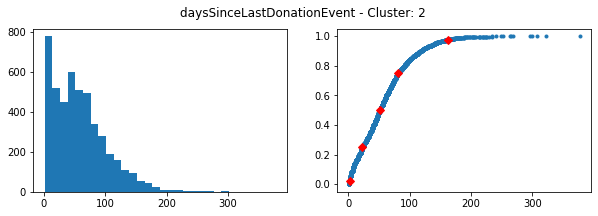

count    10877.000000
mean        11.213018
std         14.755496
min          1.000000
25%          2.000000
50%          6.000000
75%         14.000000
max        199.000000
Name: daysSinceLastDonationEvent, dtype: float64


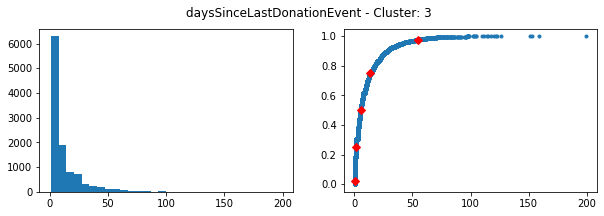

count    1746.000000
mean        9.098179
std        17.010575
min         1.000000
25%         1.586429
50%         3.006098
75%         7.885417
max       192.000000
Name: averageDaysBetweenClickedCollectBonus, dtype: float64


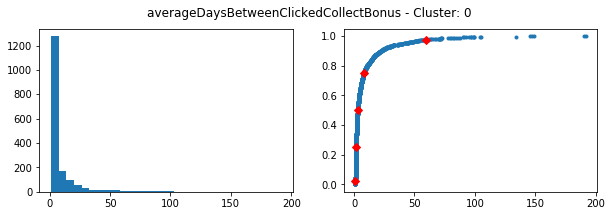

count    28633.000000
mean         4.916589
std          5.610998
min          1.000000
25%          1.666667
50%          3.000000
75%          6.000000
max         71.000000
Name: averageDaysBetweenClickedCollectBonus, dtype: float64


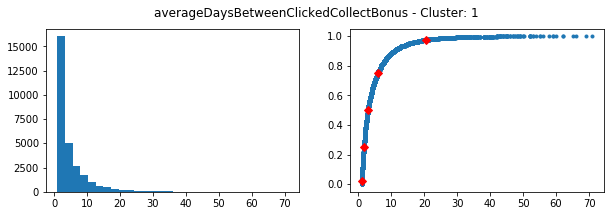

count    4697.000000
mean       34.460935
std        35.087493
min         1.000000
25%        11.727273
50%        22.200000
75%        43.666667
max       234.000000
Name: averageDaysBetweenClickedCollectBonus, dtype: float64


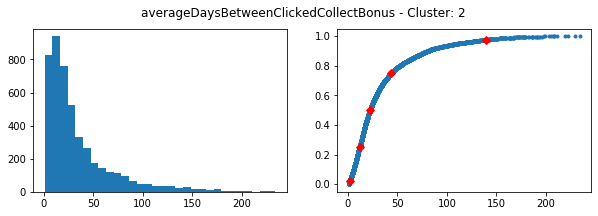

count    10877.000000
mean         3.581770
std          5.350708
min          1.000000
25%          1.421053
50%          2.012987
75%          3.500000
max         84.500000
Name: averageDaysBetweenClickedCollectBonus, dtype: float64


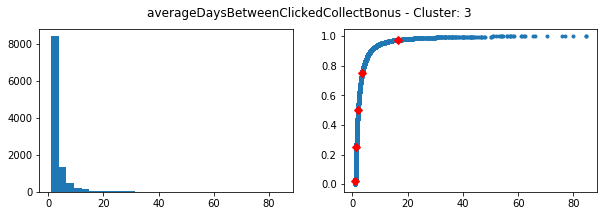

count    1746.000000
mean      218.447308
std       105.705965
min         9.000000
25%       142.250000
50%       205.500000
75%       273.000000
max       719.000000
Name: halfLifeDonation, dtype: float64


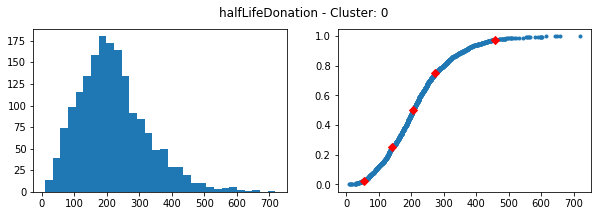

count    28633.000000
mean        17.286313
std         19.866009
min          1.000000
25%          4.000000
50%         10.000000
75%         23.000000
max        189.000000
Name: halfLifeDonation, dtype: float64


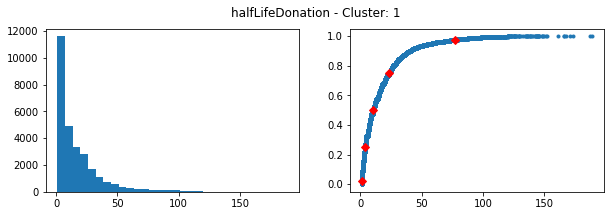

count    4697.000000
mean       51.747498
std        50.117967
min         1.000000
25%        11.000000
50%        35.000000
75%        82.000000
max       378.000000
Name: halfLifeDonation, dtype: float64


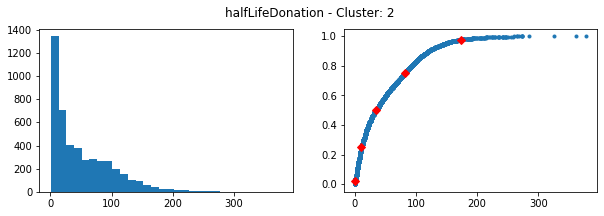

count    10877.000000
mean        75.519169
std         36.956053
min          1.000000
25%         48.000000
50%         71.000000
75%         96.000000
max        272.000000
Name: halfLifeDonation, dtype: float64


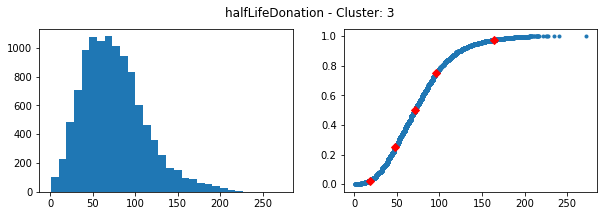

count    1746.000000
mean        7.174112
std        12.724209
min         1.000000
25%         1.000000
50%         2.000000
75%         7.000000
max       107.000000
Name: daysSinceLastEventsClickedCollectFeed, dtype: float64


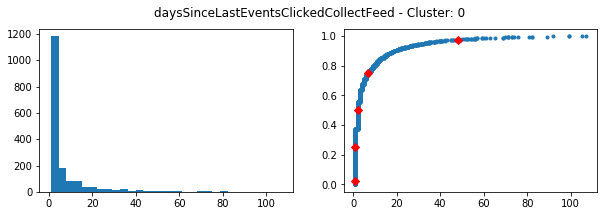

count    28633.000000
mean         8.134146
std         10.980029
min          1.000000
25%          2.000000
50%          4.000000
75%         10.000000
max        142.000000
Name: daysSinceLastEventsClickedCollectFeed, dtype: float64


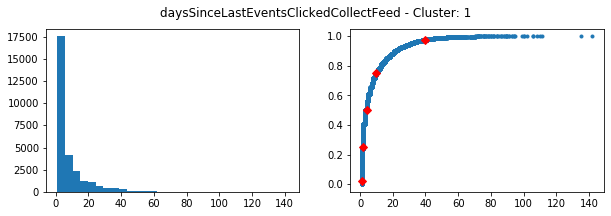

count    4697.000000
mean       49.007664
std        38.841846
min         1.000000
25%        17.000000
50%        44.000000
75%        71.000000
max       234.000000
Name: daysSinceLastEventsClickedCollectFeed, dtype: float64


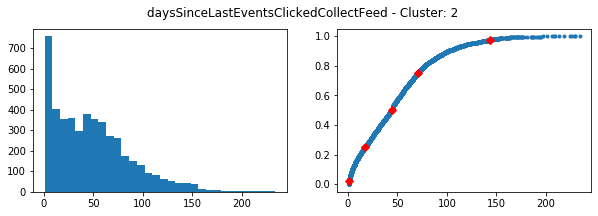

count    10877.000000
mean         4.971316
std          7.493463
min          1.000000
25%          1.000000
50%          2.000000
75%          5.000000
max         98.000000
Name: daysSinceLastEventsClickedCollectFeed, dtype: float64


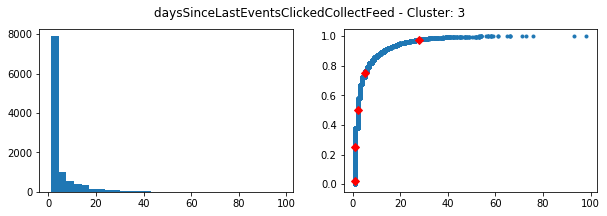

count    1746.000000
mean       14.211123
std        16.905035
min         1.000000
25%         4.776891
50%         9.022774
75%        16.880533
max       184.000000
Name: averageDaysBetweenDonationEvents, dtype: float64


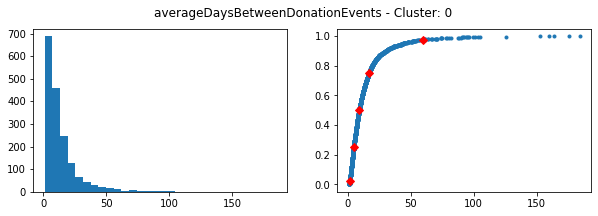

count    28633.000000
mean         5.702580
std          5.485023
min          1.000000
25%          2.000000
50%          3.800000
75%          7.285714
max         63.000000
Name: averageDaysBetweenDonationEvents, dtype: float64


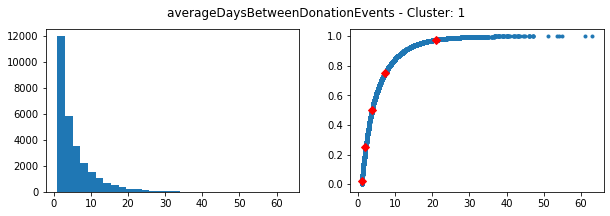

count    4697.000000
mean       27.320700
std        23.615313
min         1.000000
25%        13.000000
50%        21.333333
75%        34.400000
max       377.000000
Name: averageDaysBetweenDonationEvents, dtype: float64


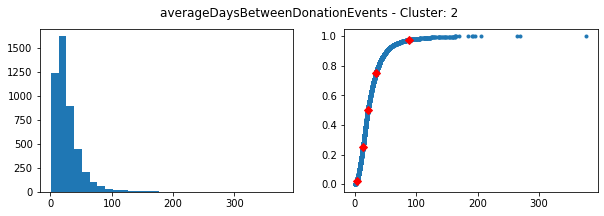

count    10877.000000
mean         6.293499
std          6.367722
min          1.000000
25%          2.358025
50%          4.214286
75%          7.777778
max        103.500000
Name: averageDaysBetweenDonationEvents, dtype: float64


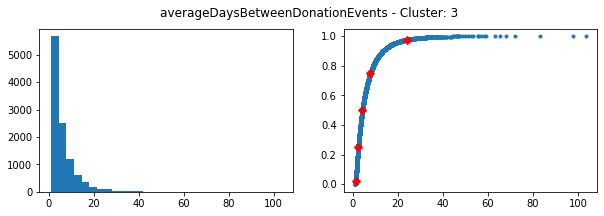

count    1746.000000
mean      160.601947
std       137.581522
min         2.000000
25%        60.000000
50%       121.000000
75%       216.000000
max       892.000000
Name: donationTotal, dtype: float64


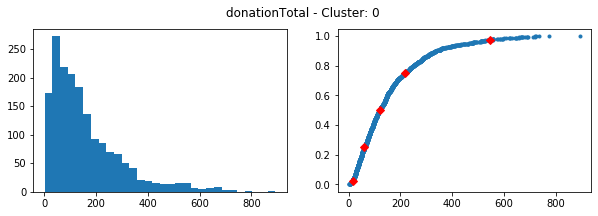

count    28633.000000
mean        29.353194
std         27.145426
min          2.000000
25%         11.000000
50%         21.000000
75%         38.000000
max        448.000000
Name: donationTotal, dtype: float64


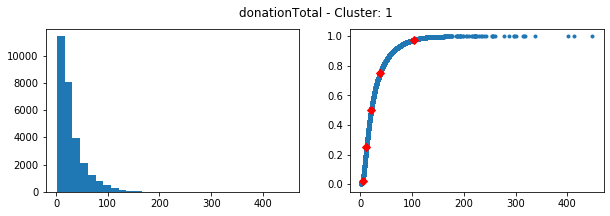

count    4697.000000
mean       26.827337
std        24.152364
min         2.000000
25%        11.000000
50%        20.000000
75%        34.000000
max       249.000000
Name: donationTotal, dtype: float64


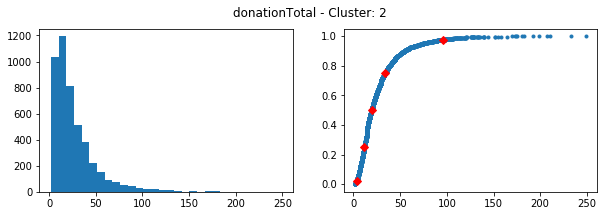

count    10877.000000
mean       116.098740
std         90.888375
min          2.000000
25%         52.000000
50%         92.000000
75%        155.000000
max       1360.000000
Name: donationTotal, dtype: float64


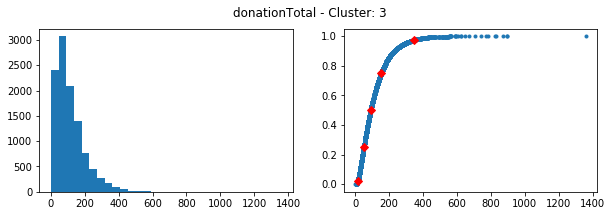

count    1746.000000
mean        0.385126
std         0.347821
min         0.005277
25%         0.140486
50%         0.283326
75%         0.509896
max         2.309353
Name: averageDonationEventCalendarDay, dtype: float64


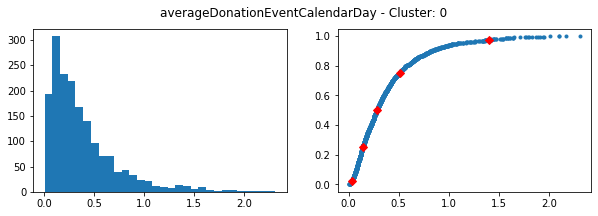

count    28633.000000
mean         0.866954
std          1.089429
min          0.010753
25%          0.268817
50%          0.555556
75%          1.111111
max         57.333333
Name: averageDonationEventCalendarDay, dtype: float64


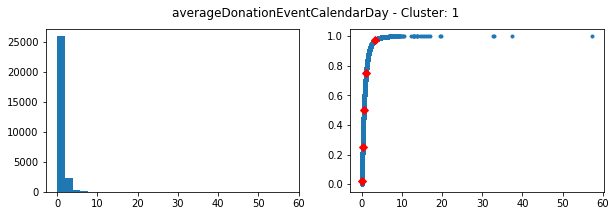

count    4697.000000
mean        0.171571
std         0.138821
min         0.003670
25%         0.078947
50%         0.132558
75%         0.219780
max         1.537037
Name: averageDonationEventCalendarDay, dtype: float64


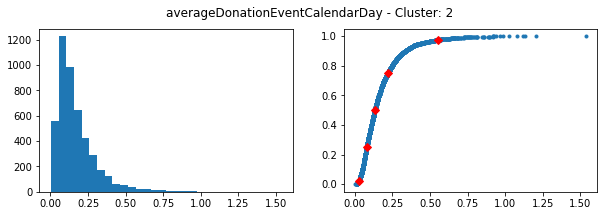

count    10877.000000
mean         0.712446
std          0.592342
min          0.014815
25%          0.290780
50%          0.544944
75%          0.957576
max          7.400000
Name: averageDonationEventCalendarDay, dtype: float64


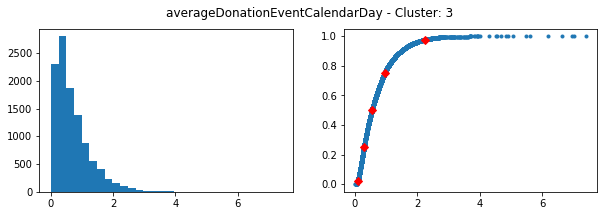

count    1746.000000
mean        1.220308
std         0.795712
min         0.044335
25%         0.666667
50%         1.040690
75%         1.604128
max         6.819444
Name: averageDonationEventActiveDay, dtype: float64


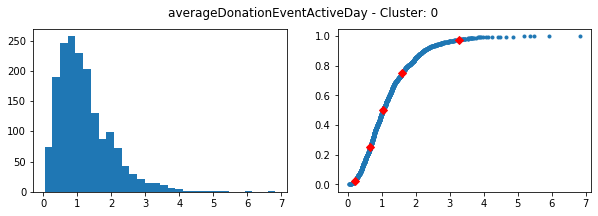

count    28633.000000
mean         1.920745
std          1.563331
min          0.039216
25%          1.000000
50%          1.590909
75%          2.400000
max         63.750000
Name: averageDonationEventActiveDay, dtype: float64


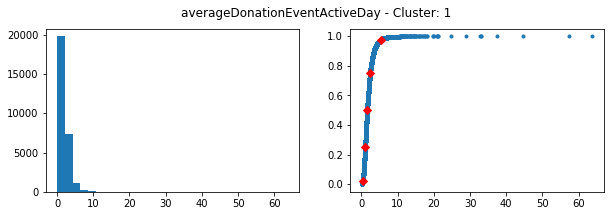

count    4697.000000
mean        1.700518
std         1.265596
min         0.040984
25%         0.869565
50%         1.400000
75%         2.166667
max        12.000000
Name: averageDonationEventActiveDay, dtype: float64


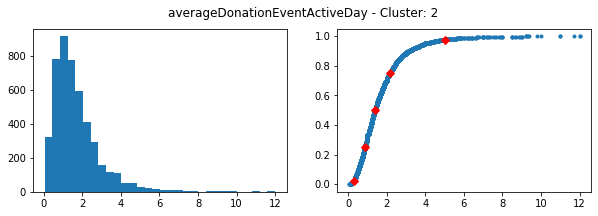

count    10877.000000
mean         1.336803
std          0.858151
min          0.022222
25%          0.697872
50%          1.156863
75%          1.828571
max          8.931034
Name: averageDonationEventActiveDay, dtype: float64


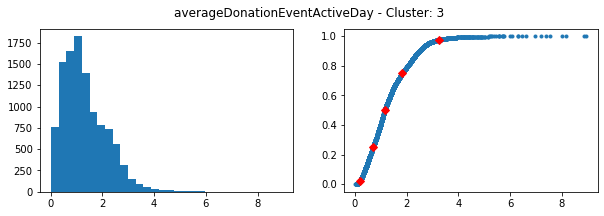

In [92]:
for f in importances.sort_values(ascending=False).index:
    for c in range(4):
        dados = ufinal[ufinal.cluster == c][f]
        
        # Generate subplot
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,3))
        _ = fig.suptitle(f + ' - Cluster: ' + str(c))
        
        # Plot histogram
        _ = ax1.hist(dados, bins=30)
        
        # Compute ECDF for versicolor data: x_vers, y_vers
        x_vers, y_vers = ecdf(dados)
        
        # Compute percentiles: ptiles_vers
        ptiles_vers = np.percentile(dados, percentiles)
        
        # Plot the ECDF
        _ = ax2.plot(x_vers, y_vers, '.')
        
        # Overlay percentiles as red diamonds.
        ptiles = [x/100 for x in percentiles]
        _ = ax2.plot(ptiles_vers, ptiles, marker='D', color='red', linestyle='none')
        
        print(dados.describe())
        plt.show()

--------------------------------------------
Feature: halfLifeActivityDays



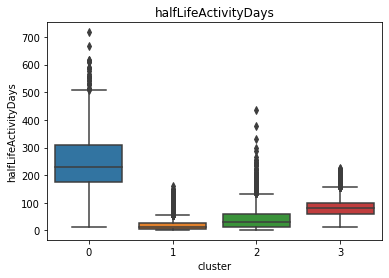


Cluster: 0
count    1746.000000
mean      246.060137
std       104.858515
min        14.000000
25%       176.000000
50%       229.500000
75%       308.750000
max       717.000000
Name: halfLifeActivityDays, dtype: float64


Cluster: 1
count    28633.000000
mean        18.467572
std         17.469790
min          2.000000
25%          6.000000
50%         13.000000
75%         26.000000
max        160.000000
Name: halfLifeActivityDays, dtype: float64


Cluster: 2
count    4697.000000
mean       42.933575
std        41.067763
min         2.000000
25%        13.000000
50%        29.000000
75%        61.000000
max       436.000000
Name: halfLifeActivityDays, dtype: float64


Cluster: 3
count    10877.000000
mean        83.061782
std         31.342712
min         12.000000
25%         60.000000
50%         80.000000
75%         99.000000
max        227.000000
Name: halfLifeActivityDays, dtype: float64



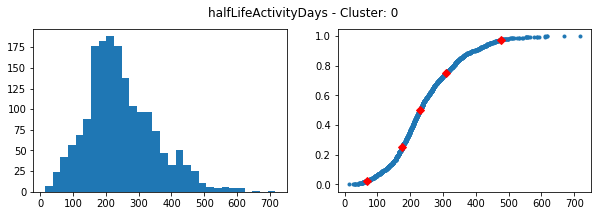

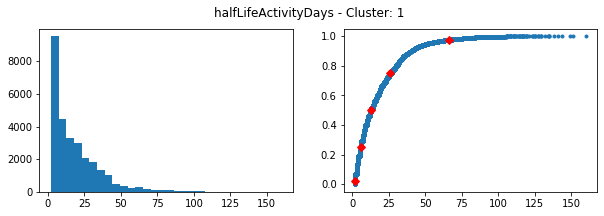

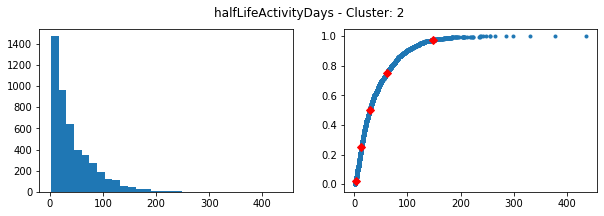

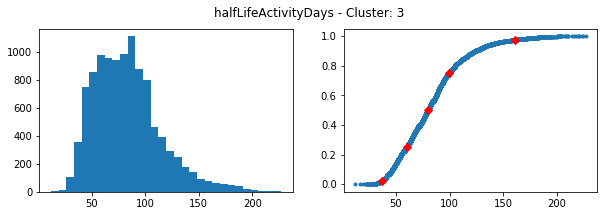

--------------------------------------------
Feature: ClickedCollectFeedTotal



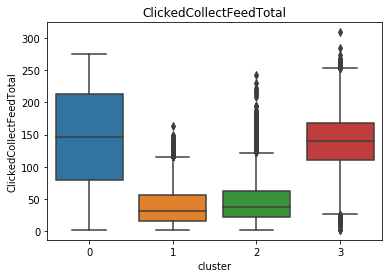


Cluster: 0
count    1746.000000
mean      144.494273
std        75.229873
min         2.000000
25%        80.250000
50%       147.000000
75%       213.000000
max       275.000000
Name: ClickedCollectFeedTotal, dtype: float64


Cluster: 1
count    28633.000000
mean        38.644501
std         27.307307
min          2.000000
25%         16.000000
50%         32.000000
75%         56.000000
max        163.000000
Name: ClickedCollectFeedTotal, dtype: float64


Cluster: 2
count    4697.000000
mean       46.147967
std        33.189451
min         2.000000
25%        22.000000
50%        38.000000
75%        62.000000
max       242.000000
Name: ClickedCollectFeedTotal, dtype: float64


Cluster: 3
count    10877.000000
mean       140.804450
std         41.187375
min          2.000000
25%        111.000000
50%        140.000000
75%        168.000000
max        309.000000
Name: ClickedCollectFeedTotal, dtype: float64



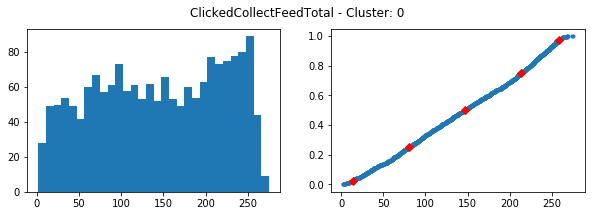

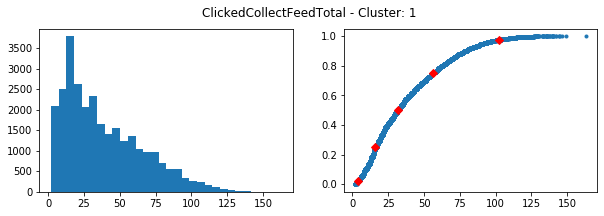

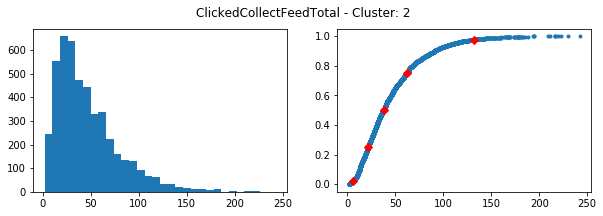

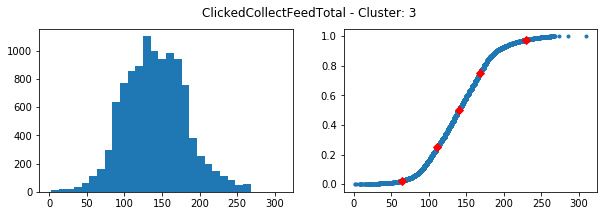

--------------------------------------------
Feature: halfLifeClickedCollectFeed



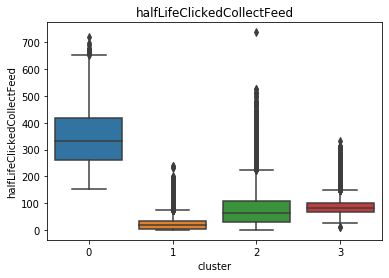


Cluster: 0
count    1746.000000
mean      344.058419
std       106.332802
min       153.000000
25%       261.000000
50%       331.000000
75%       417.000000
max       719.000000
Name: halfLifeClickedCollectFeed, dtype: float64


Cluster: 1
count    28633.000000
mean        24.355080
std         24.005179
min          1.000000
25%          6.000000
50%         18.000000
75%         34.000000
max        240.000000
Name: halfLifeClickedCollectFeed, dtype: float64


Cluster: 2
count    4697.000000
mean       83.484990
std        78.617861
min         1.000000
25%        29.000000
50%        63.000000
75%       107.000000
max       737.000000
Name: halfLifeClickedCollectFeed, dtype: float64


Cluster: 3
count    10877.000000
mean        90.529006
std         35.694211
min         10.000000
25%         69.000000
50%         84.000000
75%        101.000000
max        333.000000
Name: halfLifeClickedCollectFeed, dtype: float64



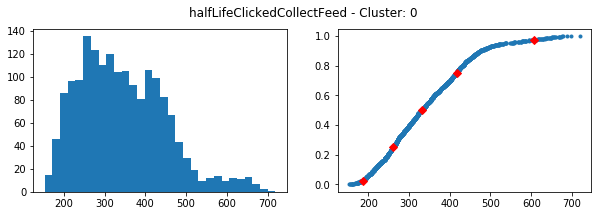

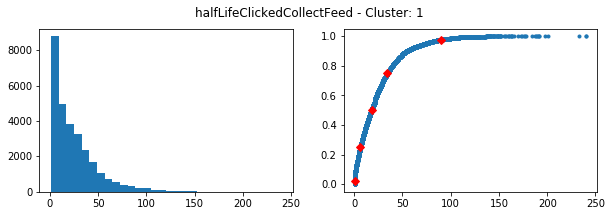

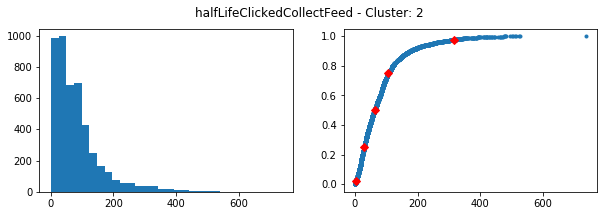

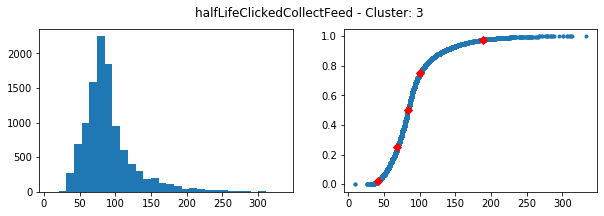

--------------------------------------------
Feature: activeDays



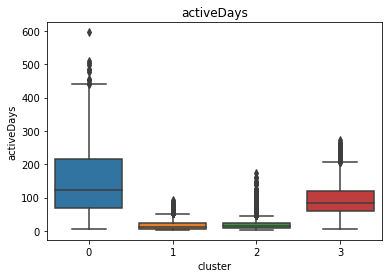


Cluster: 0
count    1746.000000
mean      147.660939
std       100.405982
min         5.000000
25%        68.000000
50%       123.000000
75%       217.000000
max       596.000000
Name: activeDays, dtype: float64


Cluster: 1
count    28633.000000
mean        18.172982
std         14.296471
min          3.000000
25%          7.000000
50%         13.000000
75%         25.000000
max         94.000000
Name: activeDays, dtype: float64


Cluster: 2
count    4697.000000
mean       19.177560
std        17.060806
min         3.000000
25%         9.000000
50%        14.000000
75%        24.000000
max       174.000000
Name: activeDays, dtype: float64


Cluster: 3
count    10877.000000
mean        91.802427
std         42.958982
min          6.000000
25%         60.000000
50%         84.000000
75%        119.000000
max        273.000000
Name: activeDays, dtype: float64



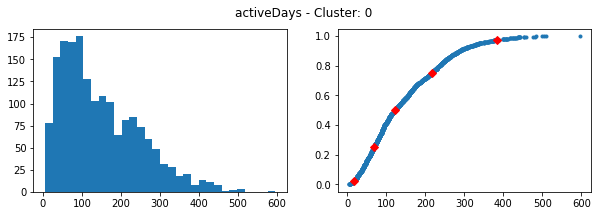

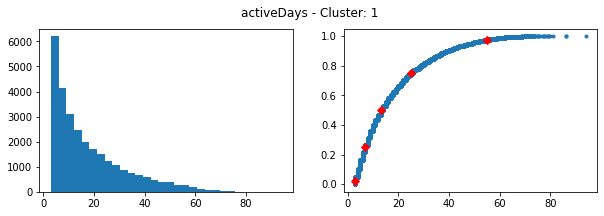

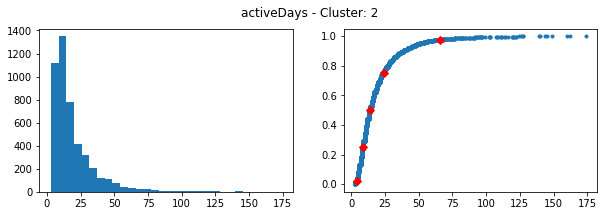

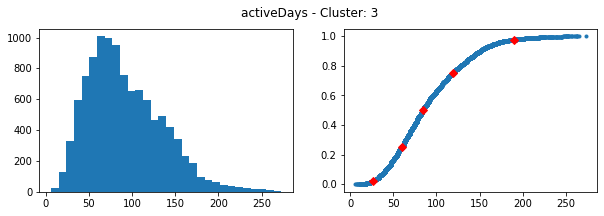

--------------------------------------------
Feature: calendarDays



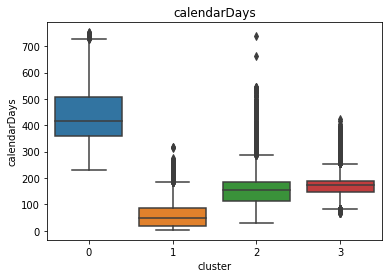


Cluster: 0
count    1746.000000
mean      435.209049
std       102.593355
min       230.000000
25%       359.250000
50%       416.000000
75%       507.000000
max       753.000000
Name: calendarDays, dtype: float64


Cluster: 1
count    28633.000000
mean        58.625991
std         47.273300
min          3.000000
25%         19.000000
50%         48.000000
75%         85.000000
max        316.000000
Name: calendarDays, dtype: float64


Cluster: 2
count    4697.000000
mean      164.319353
std        78.405662
min        29.000000
25%       114.000000
50%       153.000000
75%       183.000000
max       737.000000
Name: calendarDays, dtype: float64


Cluster: 3
count    10877.000000
mean       174.665441
std         47.556692
min         66.000000
25%        147.000000
50%        174.000000
75%        190.000000
max        423.000000
Name: calendarDays, dtype: float64



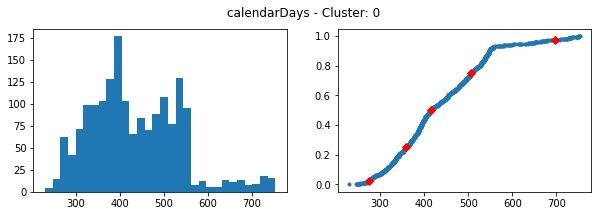

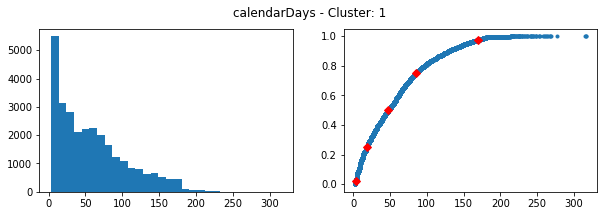

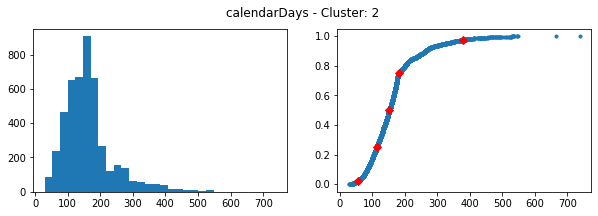

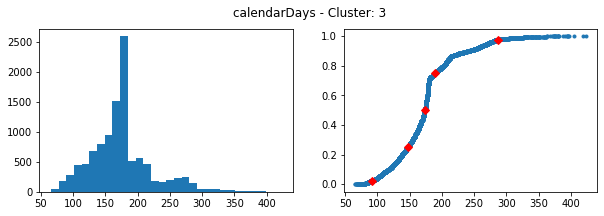

--------------------------------------------
Feature: halfLifeClickedCollectBonus



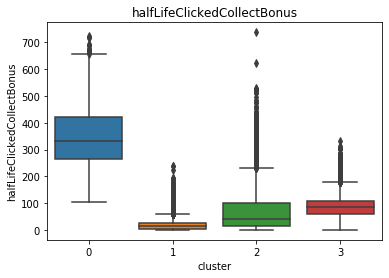


Cluster: 0
count    1746.000000
mean      348.630011
std       106.115893
min       104.000000
25%       265.000000
50%       332.000000
75%       421.750000
max       723.000000
Name: halfLifeClickedCollectBonus, dtype: float64


Cluster: 1
count    28633.000000
mean        20.744072
std         21.300492
min          1.000000
25%          6.000000
50%         14.000000
75%         28.000000
max        240.000000
Name: halfLifeClickedCollectBonus, dtype: float64


Cluster: 2
count    4697.000000
mean       71.640835
std        81.050389
min         1.000000
25%        14.000000
50%        42.000000
75%       101.000000
max       737.000000
Name: halfLifeClickedCollectBonus, dtype: float64


Cluster: 3
count    10877.000000
mean        90.849683
std         41.127775
min          2.000000
25%         62.000000
50%         85.000000
75%        109.000000
max        333.000000
Name: halfLifeClickedCollectBonus, dtype: float64



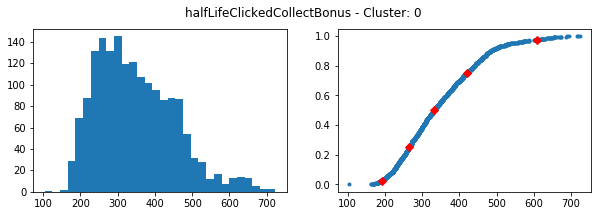

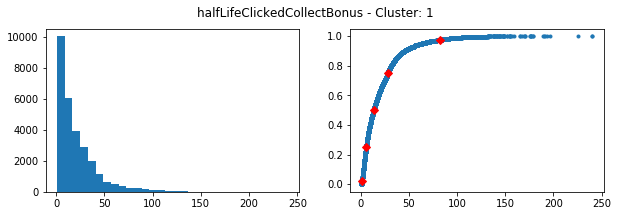

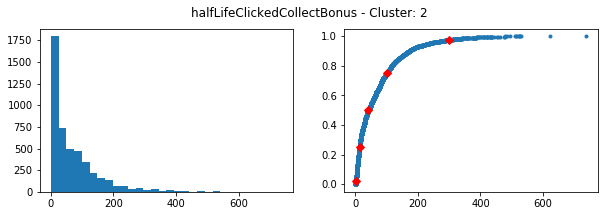

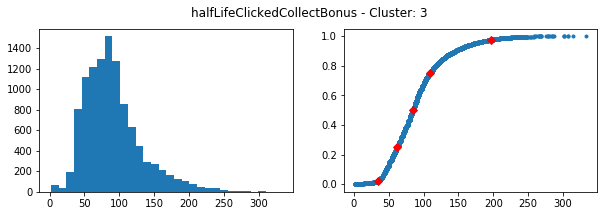

--------------------------------------------
Feature: ClickedCollectBonusTotal



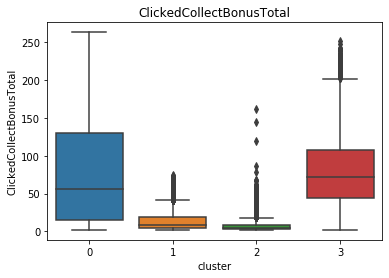


Cluster: 0
count    1746.000000
mean       77.541810
std        69.450539
min         2.000000
25%        15.250000
50%        55.500000
75%       130.000000
max       263.000000
Name: ClickedCollectBonusTotal, dtype: float64


Cluster: 1
count    28633.000000
mean        13.396221
std         12.918036
min          2.000000
25%          4.000000
50%          8.000000
75%         19.000000
max         75.000000
Name: ClickedCollectBonusTotal, dtype: float64


Cluster: 2
count    4697.000000
mean        7.556951
std         8.702457
min         2.000000
25%         3.000000
50%         5.000000
75%         9.000000
max       162.000000
Name: ClickedCollectBonusTotal, dtype: float64


Cluster: 3
count    10877.000000
mean        77.643928
std         44.807286
min          2.000000
25%         44.000000
50%         72.000000
75%        107.000000
max        252.000000
Name: ClickedCollectBonusTotal, dtype: float64



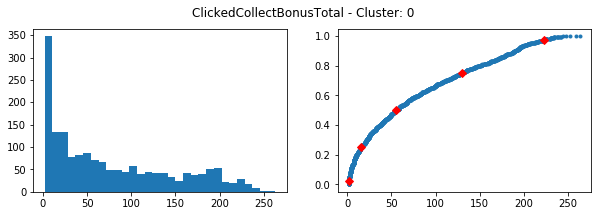

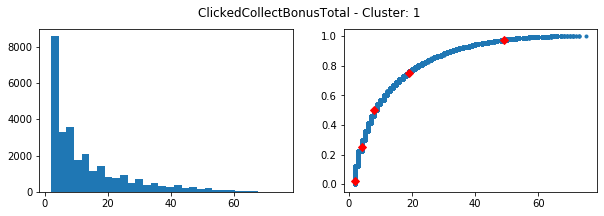

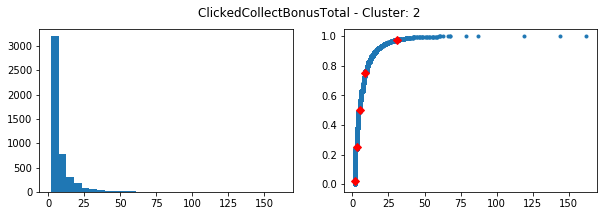

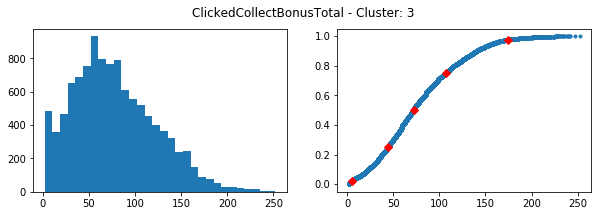

--------------------------------------------
Feature: daysSinceLastEventsClickedCollectBonus



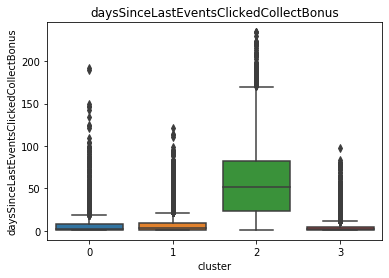


Cluster: 0
count    1746.000000
mean        9.557847
std        19.141917
min         1.000000
25%         1.000000
50%         2.000000
75%         8.000000
max       192.000000
Name: daysSinceLastEventsClickedCollectBonus, dtype: float64


Cluster: 1
count    28633.000000
mean         7.777704
std         10.604297
min          1.000000
25%          1.000000
50%          3.000000
75%          9.000000
max        121.000000
Name: daysSinceLastEventsClickedCollectBonus, dtype: float64


Cluster: 2
count    4697.000000
mean       57.862891
std        43.510479
min         1.000000
25%        23.000000
50%        52.000000
75%        82.000000
max       234.000000
Name: daysSinceLastEventsClickedCollectBonus, dtype: float64


Cluster: 3
count    10877.000000
mean         5.320493
std          8.560081
min          1.000000
25%          1.000000
50%          2.000000
75%          5.000000
max         98.000000
Name: daysSinceLastEventsClickedCollectBonus, dtype: float64



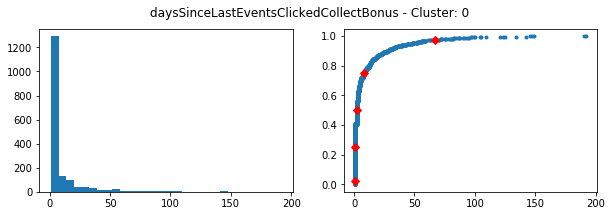

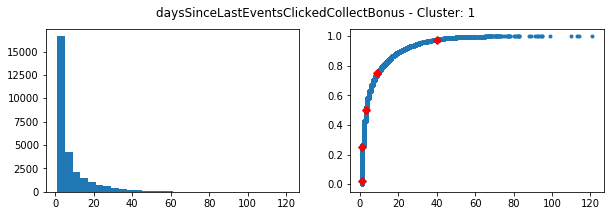

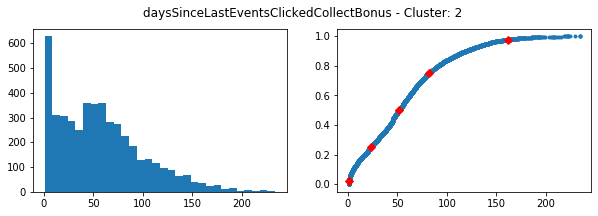

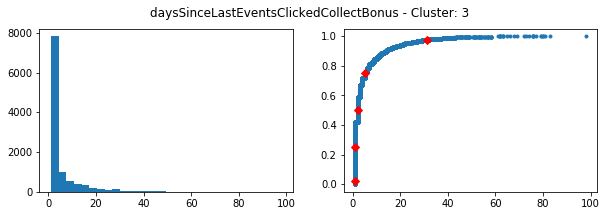

--------------------------------------------
Feature: averageDaysBetweenClickedCollectFeed



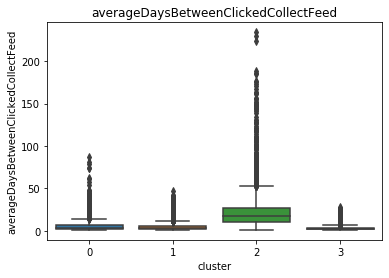


Cluster: 0
count    1746.000000
mean        5.987438
std         8.120796
min         1.000000
25%         1.720147
50%         3.006173
75%         6.696078
max        87.500000
Name: averageDaysBetweenClickedCollectFeed, dtype: float64


Cluster: 1
count    28633.000000
mean         4.505386
std          4.020786
min          1.000000
25%          1.857143
50%          3.000000
75%          5.750000
max         47.000000
Name: averageDaysBetweenClickedCollectFeed, dtype: float64


Cluster: 2
count    4697.000000
mean       22.553108
std        21.155896
min         1.000000
25%        10.272727
50%        16.833333
75%        27.166667
max       234.000000
Name: averageDaysBetweenClickedCollectFeed, dtype: float64


Cluster: 3
count    10877.000000
mean         2.965914
std          2.354842
min          1.000000
25%          1.560976
50%          2.135593
75%          3.431373
max         28.571429
Name: averageDaysBetweenClickedCollectFeed, dtype: float64



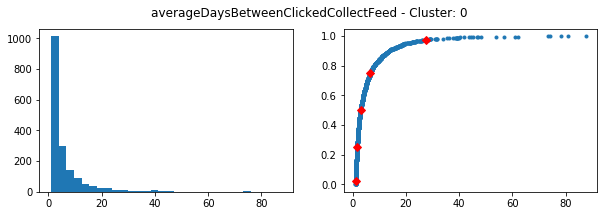

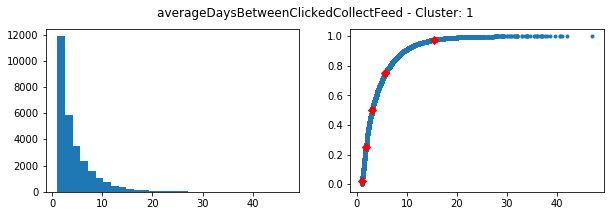

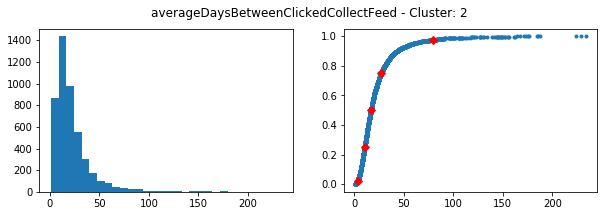

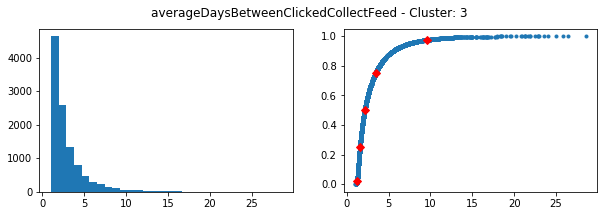

--------------------------------------------
Feature: daysSinceLastDonationEvent



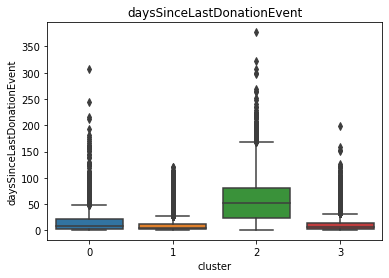


Cluster: 0
count    1746.000000
mean       17.904353
std        27.560229
min         1.000000
25%         3.000000
50%         8.000000
75%        21.000000
max       307.000000
Name: daysSinceLastDonationEvent, dtype: float64


Cluster: 1
count    28633.000000
mean         9.607167
std         12.385417
min          1.000000
25%          2.000000
50%          5.000000
75%         12.000000
max        121.000000
Name: daysSinceLastDonationEvent, dtype: float64


Cluster: 2
count    4697.000000
mean       58.307004
std        44.122403
min         1.000000
25%        23.000000
50%        52.000000
75%        81.000000
max       377.000000
Name: daysSinceLastDonationEvent, dtype: float64


Cluster: 3
count    10877.000000
mean        11.213018
std         14.755496
min          1.000000
25%          2.000000
50%          6.000000
75%         14.000000
max        199.000000
Name: daysSinceLastDonationEvent, dtype: float64



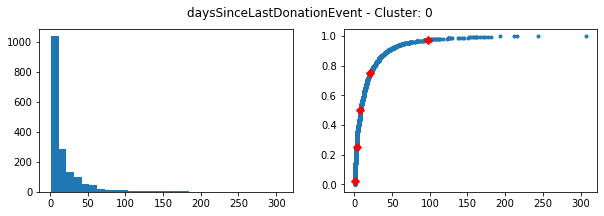

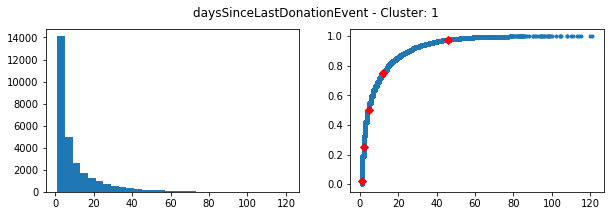

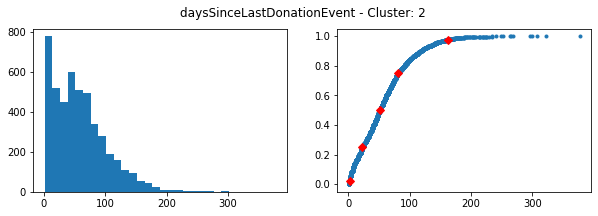

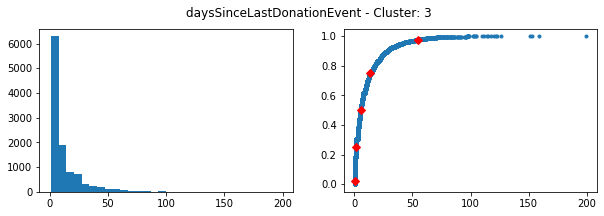

--------------------------------------------
Feature: averageDaysBetweenClickedCollectBonus



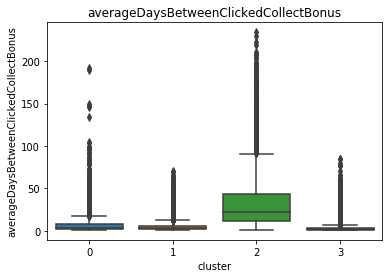


Cluster: 0
count    1746.000000
mean        9.098179
std        17.010575
min         1.000000
25%         1.586429
50%         3.006098
75%         7.885417
max       192.000000
Name: averageDaysBetweenClickedCollectBonus, dtype: float64


Cluster: 1
count    28633.000000
mean         4.916589
std          5.610998
min          1.000000
25%          1.666667
50%          3.000000
75%          6.000000
max         71.000000
Name: averageDaysBetweenClickedCollectBonus, dtype: float64


Cluster: 2
count    4697.000000
mean       34.460935
std        35.087493
min         1.000000
25%        11.727273
50%        22.200000
75%        43.666667
max       234.000000
Name: averageDaysBetweenClickedCollectBonus, dtype: float64


Cluster: 3
count    10877.000000
mean         3.581770
std          5.350708
min          1.000000
25%          1.421053
50%          2.012987
75%          3.500000
max         84.500000
Name: averageDaysBetweenClickedCollectBonus, dtype: float64



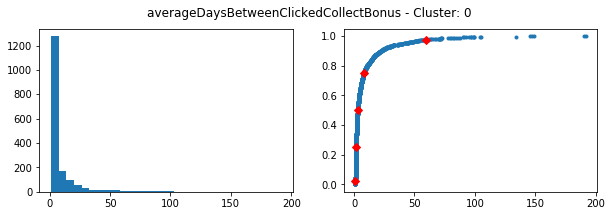

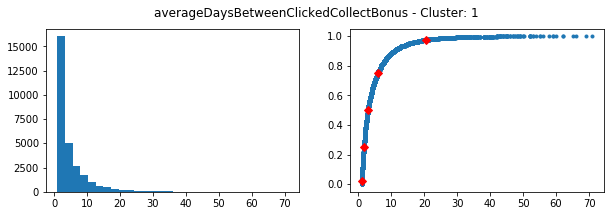

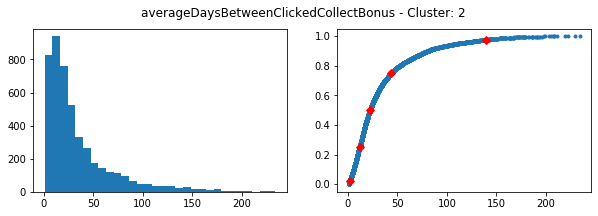

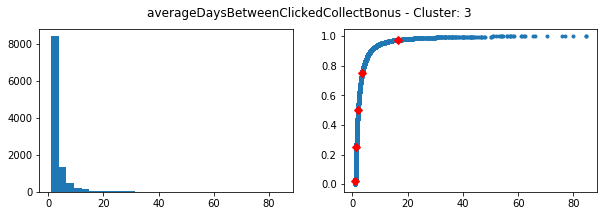

--------------------------------------------
Feature: halfLifeDonation



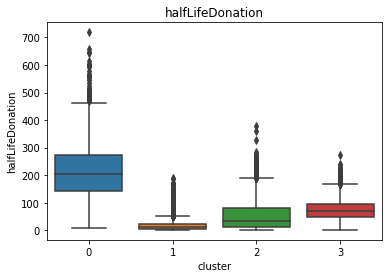


Cluster: 0
count    1746.000000
mean      218.447308
std       105.705965
min         9.000000
25%       142.250000
50%       205.500000
75%       273.000000
max       719.000000
Name: halfLifeDonation, dtype: float64


Cluster: 1
count    28633.000000
mean        17.286313
std         19.866009
min          1.000000
25%          4.000000
50%         10.000000
75%         23.000000
max        189.000000
Name: halfLifeDonation, dtype: float64


Cluster: 2
count    4697.000000
mean       51.747498
std        50.117967
min         1.000000
25%        11.000000
50%        35.000000
75%        82.000000
max       378.000000
Name: halfLifeDonation, dtype: float64


Cluster: 3
count    10877.000000
mean        75.519169
std         36.956053
min          1.000000
25%         48.000000
50%         71.000000
75%         96.000000
max        272.000000
Name: halfLifeDonation, dtype: float64



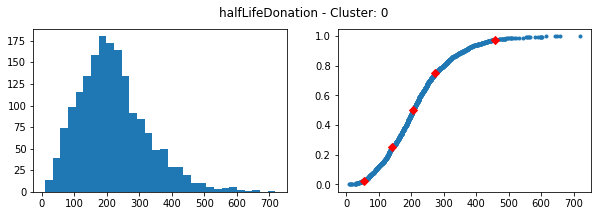

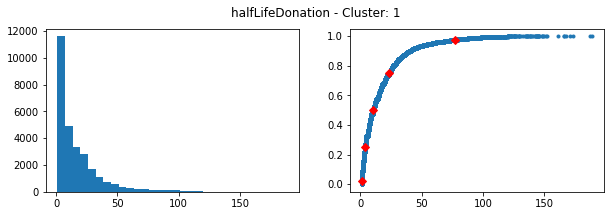

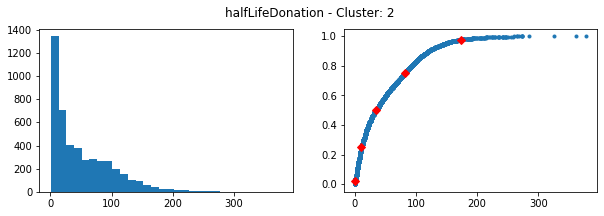

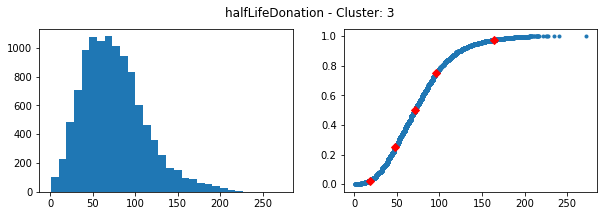

--------------------------------------------
Feature: daysSinceLastEventsClickedCollectFeed



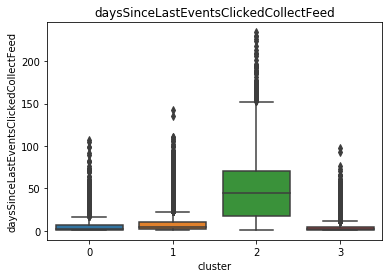


Cluster: 0
count    1746.000000
mean        7.174112
std        12.724209
min         1.000000
25%         1.000000
50%         2.000000
75%         7.000000
max       107.000000
Name: daysSinceLastEventsClickedCollectFeed, dtype: float64


Cluster: 1
count    28633.000000
mean         8.134146
std         10.980029
min          1.000000
25%          2.000000
50%          4.000000
75%         10.000000
max        142.000000
Name: daysSinceLastEventsClickedCollectFeed, dtype: float64


Cluster: 2
count    4697.000000
mean       49.007664
std        38.841846
min         1.000000
25%        17.000000
50%        44.000000
75%        71.000000
max       234.000000
Name: daysSinceLastEventsClickedCollectFeed, dtype: float64


Cluster: 3
count    10877.000000
mean         4.971316
std          7.493463
min          1.000000
25%          1.000000
50%          2.000000
75%          5.000000
max         98.000000
Name: daysSinceLastEventsClickedCollectFeed, dtype: float64



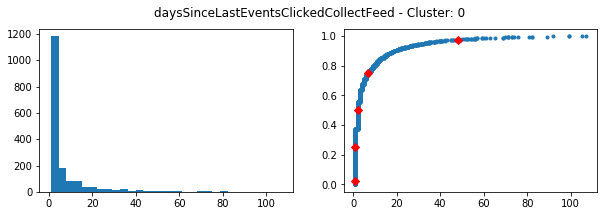

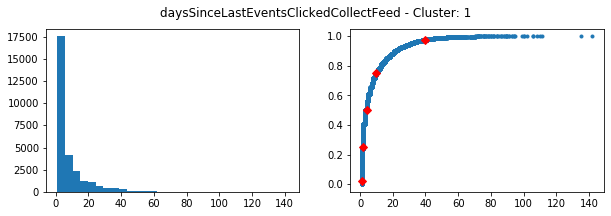

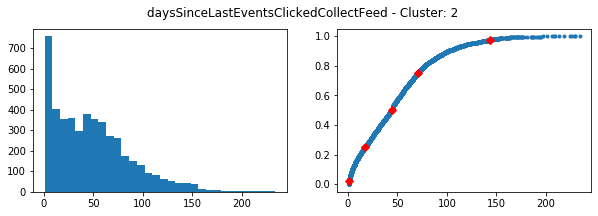

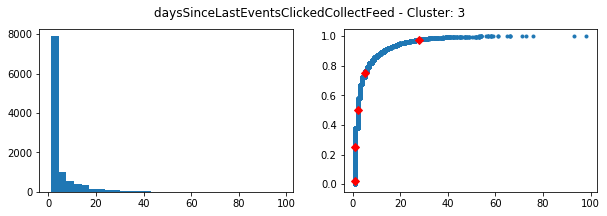

--------------------------------------------
Feature: averageDaysBetweenDonationEvents



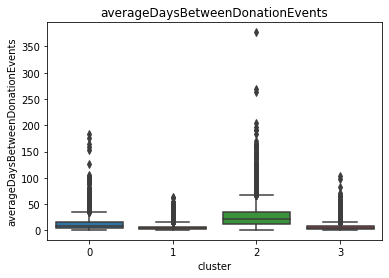


Cluster: 0
count    1746.000000
mean       14.211123
std        16.905035
min         1.000000
25%         4.776891
50%         9.022774
75%        16.880533
max       184.000000
Name: averageDaysBetweenDonationEvents, dtype: float64


Cluster: 1
count    28633.000000
mean         5.702580
std          5.485023
min          1.000000
25%          2.000000
50%          3.800000
75%          7.285714
max         63.000000
Name: averageDaysBetweenDonationEvents, dtype: float64


Cluster: 2
count    4697.000000
mean       27.320700
std        23.615313
min         1.000000
25%        13.000000
50%        21.333333
75%        34.400000
max       377.000000
Name: averageDaysBetweenDonationEvents, dtype: float64


Cluster: 3
count    10877.000000
mean         6.293499
std          6.367722
min          1.000000
25%          2.358025
50%          4.214286
75%          7.777778
max        103.500000
Name: averageDaysBetweenDonationEvents, dtype: float64



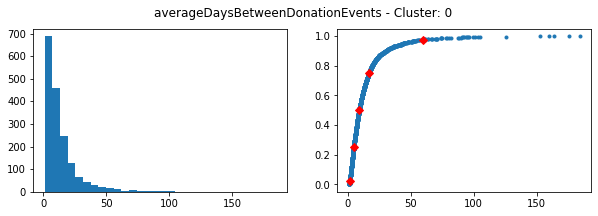

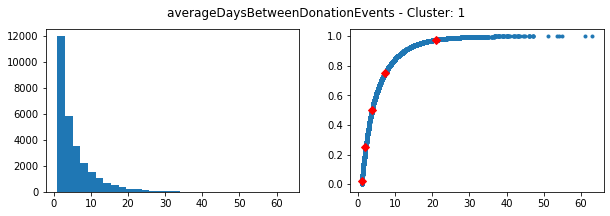

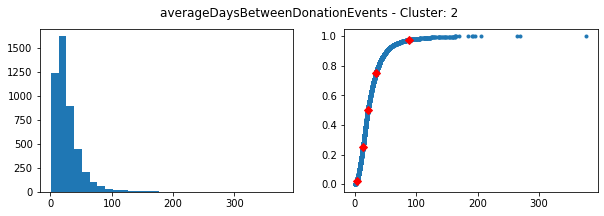

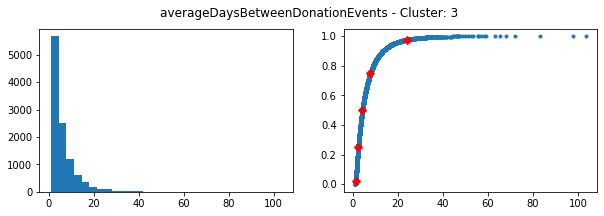

--------------------------------------------
Feature: donationTotal



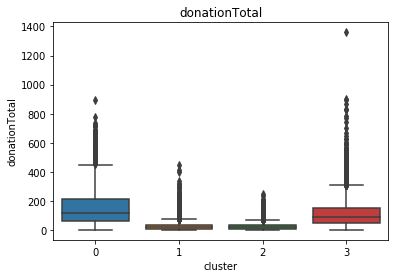


Cluster: 0
count    1746.000000
mean      160.601947
std       137.581522
min         2.000000
25%        60.000000
50%       121.000000
75%       216.000000
max       892.000000
Name: donationTotal, dtype: float64


Cluster: 1
count    28633.000000
mean        29.353194
std         27.145426
min          2.000000
25%         11.000000
50%         21.000000
75%         38.000000
max        448.000000
Name: donationTotal, dtype: float64


Cluster: 2
count    4697.000000
mean       26.827337
std        24.152364
min         2.000000
25%        11.000000
50%        20.000000
75%        34.000000
max       249.000000
Name: donationTotal, dtype: float64


Cluster: 3
count    10877.000000
mean       116.098740
std         90.888375
min          2.000000
25%         52.000000
50%         92.000000
75%        155.000000
max       1360.000000
Name: donationTotal, dtype: float64



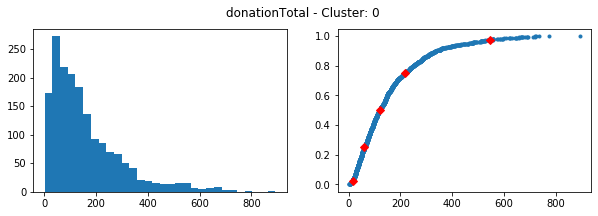

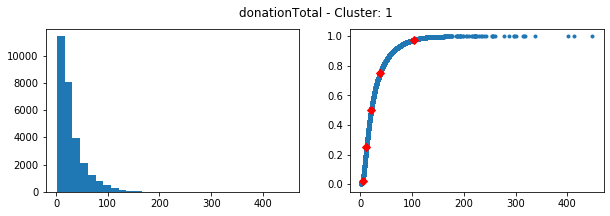

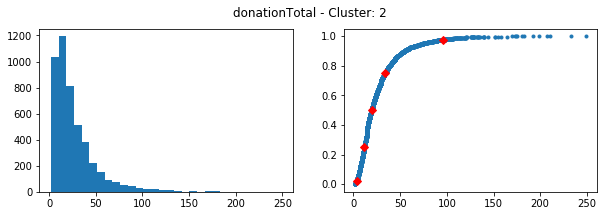

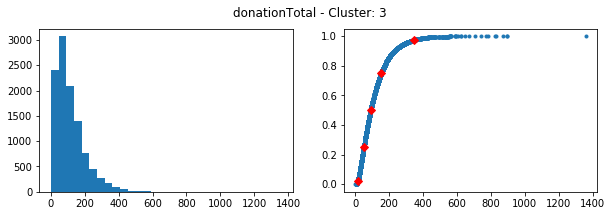

--------------------------------------------
Feature: averageDonationEventCalendarDay



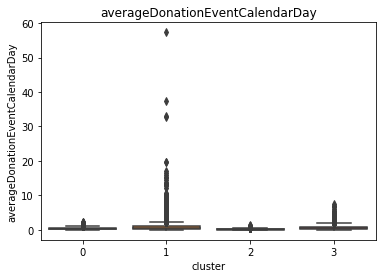


Cluster: 0
count    1746.000000
mean        0.385126
std         0.347821
min         0.005277
25%         0.140486
50%         0.283326
75%         0.509896
max         2.309353
Name: averageDonationEventCalendarDay, dtype: float64


Cluster: 1
count    28633.000000
mean         0.866954
std          1.089429
min          0.010753
25%          0.268817
50%          0.555556
75%          1.111111
max         57.333333
Name: averageDonationEventCalendarDay, dtype: float64


Cluster: 2
count    4697.000000
mean        0.171571
std         0.138821
min         0.003670
25%         0.078947
50%         0.132558
75%         0.219780
max         1.537037
Name: averageDonationEventCalendarDay, dtype: float64


Cluster: 3
count    10877.000000
mean         0.712446
std          0.592342
min          0.014815
25%          0.290780
50%          0.544944
75%          0.957576
max          7.400000
Name: averageDonationEventCalendarDay, dtype: float64



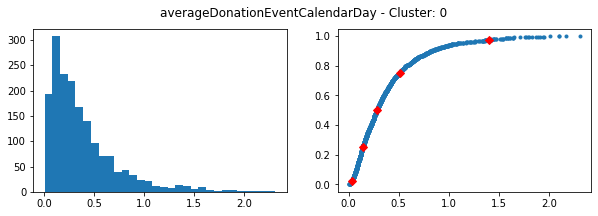

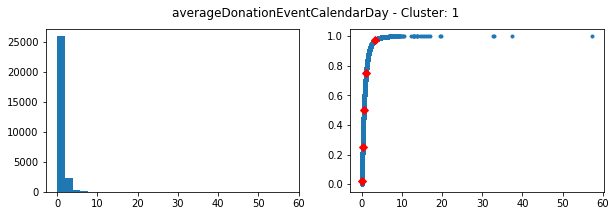

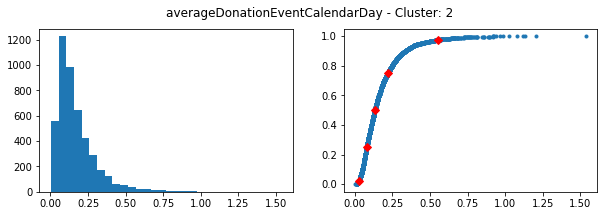

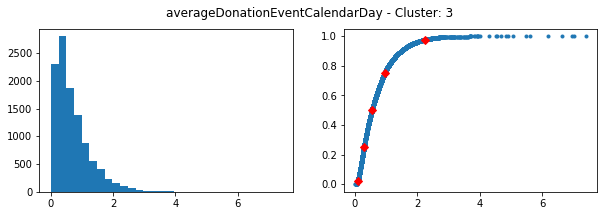

--------------------------------------------
Feature: averageDonationEventActiveDay



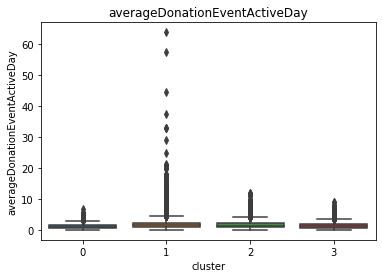


Cluster: 0
count    1746.000000
mean        1.220308
std         0.795712
min         0.044335
25%         0.666667
50%         1.040690
75%         1.604128
max         6.819444
Name: averageDonationEventActiveDay, dtype: float64


Cluster: 1
count    28633.000000
mean         1.920745
std          1.563331
min          0.039216
25%          1.000000
50%          1.590909
75%          2.400000
max         63.750000
Name: averageDonationEventActiveDay, dtype: float64


Cluster: 2
count    4697.000000
mean        1.700518
std         1.265596
min         0.040984
25%         0.869565
50%         1.400000
75%         2.166667
max        12.000000
Name: averageDonationEventActiveDay, dtype: float64


Cluster: 3
count    10877.000000
mean         1.336803
std          0.858151
min          0.022222
25%          0.697872
50%          1.156863
75%          1.828571
max          8.931034
Name: averageDonationEventActiveDay, dtype: float64



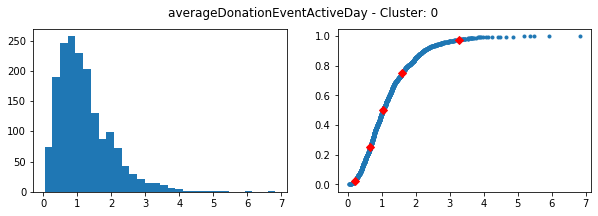

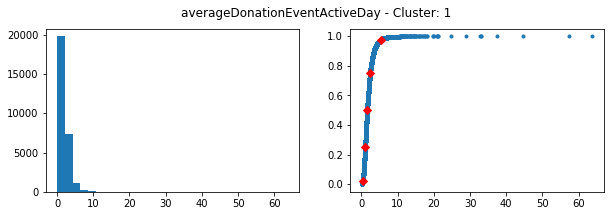

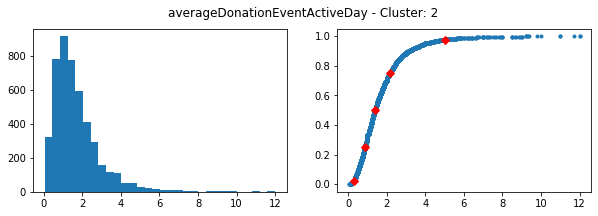

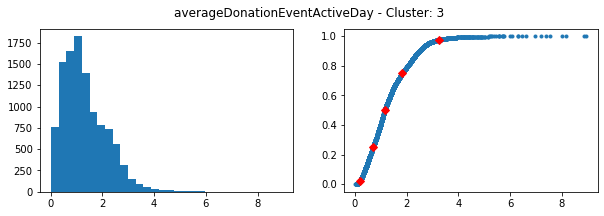

In [94]:
for f in importances.sort_values(ascending=False).index:
    print('--------------------------------------------')
    print('Feature: ' + f)
    print()
    # Create box plot with Seaborn's default settings
    _ = sns.boxplot(x='cluster', y=f, data=ufinal)
    
    # Label the axes
    _ = plt.xlabel('cluster')
    _ = plt.title(f)
    
    # Show the plot
    plt.show()
    
    for c in range(4):
        print()
        print('Cluster: ' + str(c))
        print(ufinal[ufinal.cluster == c][f].describe())
        print()
    
    for c in range(4):
        dados = ufinal[ufinal.cluster == c][f]
        
        # Generate subplot
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,3))
        _ = fig.suptitle(f + ' - Cluster: ' + str(c))
        
        # Plot histogram
        _ = ax1.hist(dados, bins=30)
        
        # Compute ECDF for versicolor data: x_vers, y_vers
        x_vers, y_vers = ecdf(dados)
        
        # Compute percentiles: ptiles_vers
        ptiles_vers = np.percentile(dados, percentiles)
        
        # Plot the ECDF
        _ = ax2.plot(x_vers, y_vers, '.')
        
        # Overlay percentiles as red diamonds.
        ptiles = [x/100 for x in percentiles]
        _ = ax2.plot(ptiles_vers, ptiles, marker='D', color='red', linestyle='none')
        
        plt.show()

--------------------------------------------
Feature: calendarDays



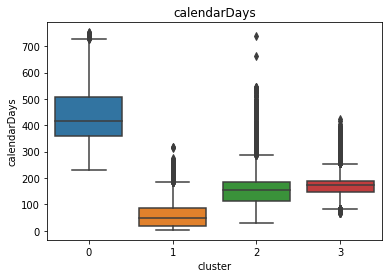


Cluster: 0
count    1746.000000
mean      435.209049
std       102.593355
min       230.000000
25%       359.250000
50%       416.000000
75%       507.000000
max       753.000000
Name: calendarDays, dtype: float64


Cluster: 1
count    28633.000000
mean        58.625991
std         47.273300
min          3.000000
25%         19.000000
50%         48.000000
75%         85.000000
max        316.000000
Name: calendarDays, dtype: float64


Cluster: 2
count    4697.000000
mean      164.319353
std        78.405662
min        29.000000
25%       114.000000
50%       153.000000
75%       183.000000
max       737.000000
Name: calendarDays, dtype: float64


Cluster: 3
count    10877.000000
mean       174.665441
std         47.556692
min         66.000000
25%        147.000000
50%        174.000000
75%        190.000000
max        423.000000
Name: calendarDays, dtype: float64

--------------------------------------------
Feature: activeDays



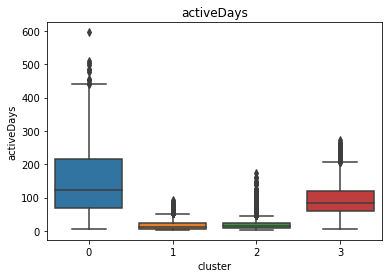


Cluster: 0
count    1746.000000
mean      147.660939
std       100.405982
min         5.000000
25%        68.000000
50%       123.000000
75%       217.000000
max       596.000000
Name: activeDays, dtype: float64


Cluster: 1
count    28633.000000
mean        18.172982
std         14.296471
min          3.000000
25%          7.000000
50%         13.000000
75%         25.000000
max         94.000000
Name: activeDays, dtype: float64


Cluster: 2
count    4697.000000
mean       19.177560
std        17.060806
min         3.000000
25%         9.000000
50%        14.000000
75%        24.000000
max       174.000000
Name: activeDays, dtype: float64


Cluster: 3
count    10877.000000
mean        91.802427
std         42.958982
min          6.000000
25%         60.000000
50%         84.000000
75%        119.000000
max        273.000000
Name: activeDays, dtype: float64

--------------------------------------------
Feature: halfLifeActivityDays



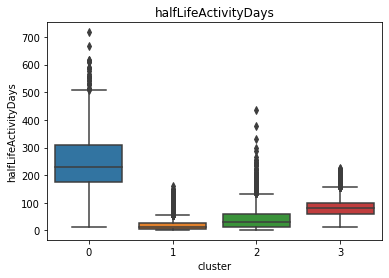


Cluster: 0
count    1746.000000
mean      246.060137
std       104.858515
min        14.000000
25%       176.000000
50%       229.500000
75%       308.750000
max       717.000000
Name: halfLifeActivityDays, dtype: float64


Cluster: 1
count    28633.000000
mean        18.467572
std         17.469790
min          2.000000
25%          6.000000
50%         13.000000
75%         26.000000
max        160.000000
Name: halfLifeActivityDays, dtype: float64


Cluster: 2
count    4697.000000
mean       42.933575
std        41.067763
min         2.000000
25%        13.000000
50%        29.000000
75%        61.000000
max       436.000000
Name: halfLifeActivityDays, dtype: float64


Cluster: 3
count    10877.000000
mean        83.061782
std         31.342712
min         12.000000
25%         60.000000
50%         80.000000
75%         99.000000
max        227.000000
Name: halfLifeActivityDays, dtype: float64

--------------------------------------------
Feature: donationTotal



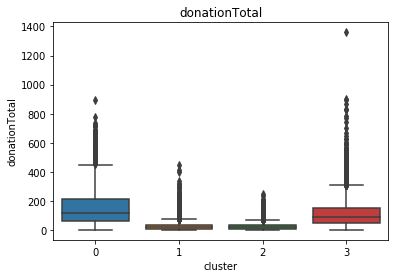


Cluster: 0
count    1746.000000
mean      160.601947
std       137.581522
min         2.000000
25%        60.000000
50%       121.000000
75%       216.000000
max       892.000000
Name: donationTotal, dtype: float64


Cluster: 1
count    28633.000000
mean        29.353194
std         27.145426
min          2.000000
25%         11.000000
50%         21.000000
75%         38.000000
max        448.000000
Name: donationTotal, dtype: float64


Cluster: 2
count    4697.000000
mean       26.827337
std        24.152364
min         2.000000
25%        11.000000
50%        20.000000
75%        34.000000
max       249.000000
Name: donationTotal, dtype: float64


Cluster: 3
count    10877.000000
mean       116.098740
std         90.888375
min          2.000000
25%         52.000000
50%         92.000000
75%        155.000000
max       1360.000000
Name: donationTotal, dtype: float64

--------------------------------------------
Feature: averageDonationEventActiveDay



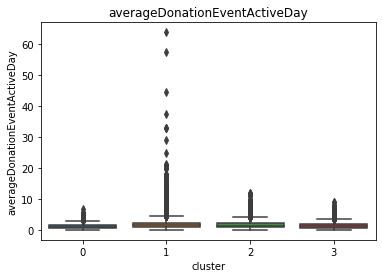


Cluster: 0
count    1746.000000
mean        1.220308
std         0.795712
min         0.044335
25%         0.666667
50%         1.040690
75%         1.604128
max         6.819444
Name: averageDonationEventActiveDay, dtype: float64


Cluster: 1
count    28633.000000
mean         1.920745
std          1.563331
min          0.039216
25%          1.000000
50%          1.590909
75%          2.400000
max         63.750000
Name: averageDonationEventActiveDay, dtype: float64


Cluster: 2
count    4697.000000
mean        1.700518
std         1.265596
min         0.040984
25%         0.869565
50%         1.400000
75%         2.166667
max        12.000000
Name: averageDonationEventActiveDay, dtype: float64


Cluster: 3
count    10877.000000
mean         1.336803
std          0.858151
min          0.022222
25%          0.697872
50%          1.156863
75%          1.828571
max          8.931034
Name: averageDonationEventActiveDay, dtype: float64

--------------------------------------------
Feature

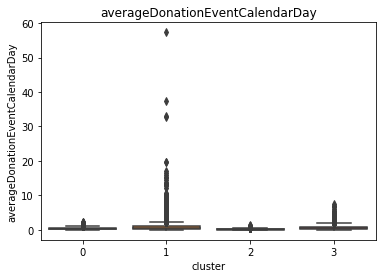


Cluster: 0
count    1746.000000
mean        0.385126
std         0.347821
min         0.005277
25%         0.140486
50%         0.283326
75%         0.509896
max         2.309353
Name: averageDonationEventCalendarDay, dtype: float64


Cluster: 1
count    28633.000000
mean         0.866954
std          1.089429
min          0.010753
25%          0.268817
50%          0.555556
75%          1.111111
max         57.333333
Name: averageDonationEventCalendarDay, dtype: float64


Cluster: 2
count    4697.000000
mean        0.171571
std         0.138821
min         0.003670
25%         0.078947
50%         0.132558
75%         0.219780
max         1.537037
Name: averageDonationEventCalendarDay, dtype: float64


Cluster: 3
count    10877.000000
mean         0.712446
std          0.592342
min          0.014815
25%          0.290780
50%          0.544944
75%          0.957576
max          7.400000
Name: averageDonationEventCalendarDay, dtype: float64

--------------------------------------------

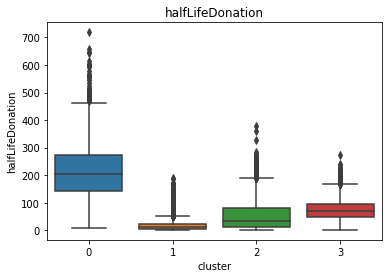


Cluster: 0
count    1746.000000
mean      218.447308
std       105.705965
min         9.000000
25%       142.250000
50%       205.500000
75%       273.000000
max       719.000000
Name: halfLifeDonation, dtype: float64


Cluster: 1
count    28633.000000
mean        17.286313
std         19.866009
min          1.000000
25%          4.000000
50%         10.000000
75%         23.000000
max        189.000000
Name: halfLifeDonation, dtype: float64


Cluster: 2
count    4697.000000
mean       51.747498
std        50.117967
min         1.000000
25%        11.000000
50%        35.000000
75%        82.000000
max       378.000000
Name: halfLifeDonation, dtype: float64


Cluster: 3
count    10877.000000
mean        75.519169
std         36.956053
min          1.000000
25%         48.000000
50%         71.000000
75%         96.000000
max        272.000000
Name: halfLifeDonation, dtype: float64

--------------------------------------------
Feature: averageDaysBetweenDonationEvents



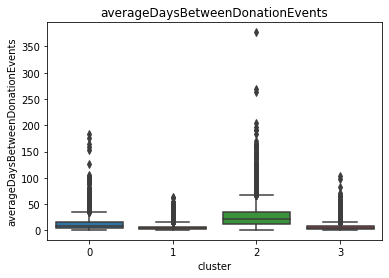


Cluster: 0
count    1746.000000
mean       14.211123
std        16.905035
min         1.000000
25%         4.776891
50%         9.022774
75%        16.880533
max       184.000000
Name: averageDaysBetweenDonationEvents, dtype: float64


Cluster: 1
count    28633.000000
mean         5.702580
std          5.485023
min          1.000000
25%          2.000000
50%          3.800000
75%          7.285714
max         63.000000
Name: averageDaysBetweenDonationEvents, dtype: float64


Cluster: 2
count    4697.000000
mean       27.320700
std        23.615313
min         1.000000
25%        13.000000
50%        21.333333
75%        34.400000
max       377.000000
Name: averageDaysBetweenDonationEvents, dtype: float64


Cluster: 3
count    10877.000000
mean         6.293499
std          6.367722
min          1.000000
25%          2.358025
50%          4.214286
75%          7.777778
max        103.500000
Name: averageDaysBetweenDonationEvents, dtype: float64

----------------------------------------

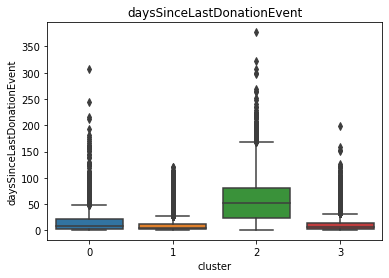


Cluster: 0
count    1746.000000
mean       17.904353
std        27.560229
min         1.000000
25%         3.000000
50%         8.000000
75%        21.000000
max       307.000000
Name: daysSinceLastDonationEvent, dtype: float64


Cluster: 1
count    28633.000000
mean         9.607167
std         12.385417
min          1.000000
25%          2.000000
50%          5.000000
75%         12.000000
max        121.000000
Name: daysSinceLastDonationEvent, dtype: float64


Cluster: 2
count    4697.000000
mean       58.307004
std        44.122403
min         1.000000
25%        23.000000
50%        52.000000
75%        81.000000
max       377.000000
Name: daysSinceLastDonationEvent, dtype: float64


Cluster: 3
count    10877.000000
mean        11.213018
std         14.755496
min          1.000000
25%          2.000000
50%          6.000000
75%         14.000000
max        199.000000
Name: daysSinceLastDonationEvent, dtype: float64

--------------------------------------------
Feature: ClickedCol

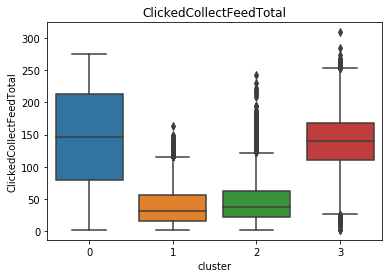


Cluster: 0
count    1746.000000
mean      144.494273
std        75.229873
min         2.000000
25%        80.250000
50%       147.000000
75%       213.000000
max       275.000000
Name: ClickedCollectFeedTotal, dtype: float64


Cluster: 1
count    28633.000000
mean        38.644501
std         27.307307
min          2.000000
25%         16.000000
50%         32.000000
75%         56.000000
max        163.000000
Name: ClickedCollectFeedTotal, dtype: float64


Cluster: 2
count    4697.000000
mean       46.147967
std        33.189451
min         2.000000
25%        22.000000
50%        38.000000
75%        62.000000
max       242.000000
Name: ClickedCollectFeedTotal, dtype: float64


Cluster: 3
count    10877.000000
mean       140.804450
std         41.187375
min          2.000000
25%        111.000000
50%        140.000000
75%        168.000000
max        309.000000
Name: ClickedCollectFeedTotal, dtype: float64

--------------------------------------------
Feature: halfLifeClickedCollect

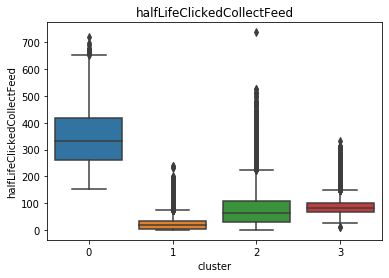


Cluster: 0
count    1746.000000
mean      344.058419
std       106.332802
min       153.000000
25%       261.000000
50%       331.000000
75%       417.000000
max       719.000000
Name: halfLifeClickedCollectFeed, dtype: float64


Cluster: 1
count    28633.000000
mean        24.355080
std         24.005179
min          1.000000
25%          6.000000
50%         18.000000
75%         34.000000
max        240.000000
Name: halfLifeClickedCollectFeed, dtype: float64


Cluster: 2
count    4697.000000
mean       83.484990
std        78.617861
min         1.000000
25%        29.000000
50%        63.000000
75%       107.000000
max       737.000000
Name: halfLifeClickedCollectFeed, dtype: float64


Cluster: 3
count    10877.000000
mean        90.529006
std         35.694211
min         10.000000
25%         69.000000
50%         84.000000
75%        101.000000
max        333.000000
Name: halfLifeClickedCollectFeed, dtype: float64

--------------------------------------------
Feature: averageDay

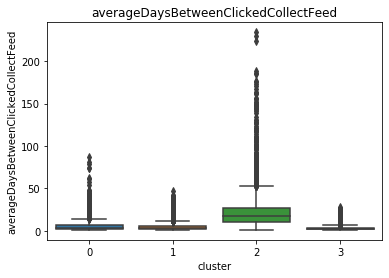


Cluster: 0
count    1746.000000
mean        5.987438
std         8.120796
min         1.000000
25%         1.720147
50%         3.006173
75%         6.696078
max        87.500000
Name: averageDaysBetweenClickedCollectFeed, dtype: float64


Cluster: 1
count    28633.000000
mean         4.505386
std          4.020786
min          1.000000
25%          1.857143
50%          3.000000
75%          5.750000
max         47.000000
Name: averageDaysBetweenClickedCollectFeed, dtype: float64


Cluster: 2
count    4697.000000
mean       22.553108
std        21.155896
min         1.000000
25%        10.272727
50%        16.833333
75%        27.166667
max       234.000000
Name: averageDaysBetweenClickedCollectFeed, dtype: float64


Cluster: 3
count    10877.000000
mean         2.965914
std          2.354842
min          1.000000
25%          1.560976
50%          2.135593
75%          3.431373
max         28.571429
Name: averageDaysBetweenClickedCollectFeed, dtype: float64

------------------------

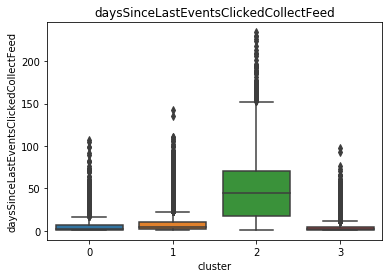


Cluster: 0
count    1746.000000
mean        7.174112
std        12.724209
min         1.000000
25%         1.000000
50%         2.000000
75%         7.000000
max       107.000000
Name: daysSinceLastEventsClickedCollectFeed, dtype: float64


Cluster: 1
count    28633.000000
mean         8.134146
std         10.980029
min          1.000000
25%          2.000000
50%          4.000000
75%         10.000000
max        142.000000
Name: daysSinceLastEventsClickedCollectFeed, dtype: float64


Cluster: 2
count    4697.000000
mean       49.007664
std        38.841846
min         1.000000
25%        17.000000
50%        44.000000
75%        71.000000
max       234.000000
Name: daysSinceLastEventsClickedCollectFeed, dtype: float64


Cluster: 3
count    10877.000000
mean         4.971316
std          7.493463
min          1.000000
25%          1.000000
50%          2.000000
75%          5.000000
max         98.000000
Name: daysSinceLastEventsClickedCollectFeed, dtype: float64

--------------------

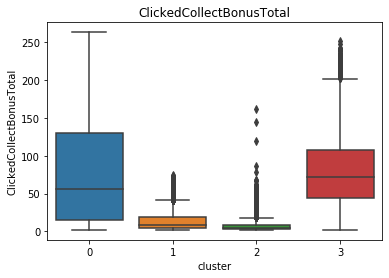


Cluster: 0
count    1746.000000
mean       77.541810
std        69.450539
min         2.000000
25%        15.250000
50%        55.500000
75%       130.000000
max       263.000000
Name: ClickedCollectBonusTotal, dtype: float64


Cluster: 1
count    28633.000000
mean        13.396221
std         12.918036
min          2.000000
25%          4.000000
50%          8.000000
75%         19.000000
max         75.000000
Name: ClickedCollectBonusTotal, dtype: float64


Cluster: 2
count    4697.000000
mean        7.556951
std         8.702457
min         2.000000
25%         3.000000
50%         5.000000
75%         9.000000
max       162.000000
Name: ClickedCollectBonusTotal, dtype: float64


Cluster: 3
count    10877.000000
mean        77.643928
std         44.807286
min          2.000000
25%         44.000000
50%         72.000000
75%        107.000000
max        252.000000
Name: ClickedCollectBonusTotal, dtype: float64

--------------------------------------------
Feature: halfLifeClickedCol

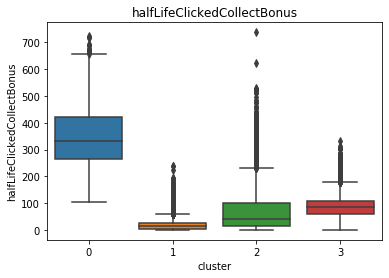


Cluster: 0
count    1746.000000
mean      348.630011
std       106.115893
min       104.000000
25%       265.000000
50%       332.000000
75%       421.750000
max       723.000000
Name: halfLifeClickedCollectBonus, dtype: float64


Cluster: 1
count    28633.000000
mean        20.744072
std         21.300492
min          1.000000
25%          6.000000
50%         14.000000
75%         28.000000
max        240.000000
Name: halfLifeClickedCollectBonus, dtype: float64


Cluster: 2
count    4697.000000
mean       71.640835
std        81.050389
min         1.000000
25%        14.000000
50%        42.000000
75%       101.000000
max       737.000000
Name: halfLifeClickedCollectBonus, dtype: float64


Cluster: 3
count    10877.000000
mean        90.849683
std         41.127775
min          2.000000
25%         62.000000
50%         85.000000
75%        109.000000
max        333.000000
Name: halfLifeClickedCollectBonus, dtype: float64

--------------------------------------------
Feature: averag

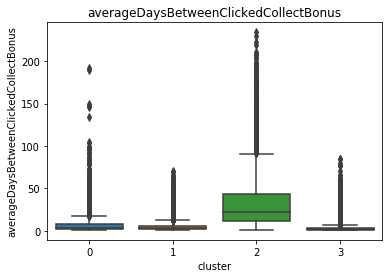


Cluster: 0
count    1746.000000
mean        9.098179
std        17.010575
min         1.000000
25%         1.586429
50%         3.006098
75%         7.885417
max       192.000000
Name: averageDaysBetweenClickedCollectBonus, dtype: float64


Cluster: 1
count    28633.000000
mean         4.916589
std          5.610998
min          1.000000
25%          1.666667
50%          3.000000
75%          6.000000
max         71.000000
Name: averageDaysBetweenClickedCollectBonus, dtype: float64


Cluster: 2
count    4697.000000
mean       34.460935
std        35.087493
min         1.000000
25%        11.727273
50%        22.200000
75%        43.666667
max       234.000000
Name: averageDaysBetweenClickedCollectBonus, dtype: float64


Cluster: 3
count    10877.000000
mean         3.581770
std          5.350708
min          1.000000
25%          1.421053
50%          2.012987
75%          3.500000
max         84.500000
Name: averageDaysBetweenClickedCollectBonus, dtype: float64

--------------------

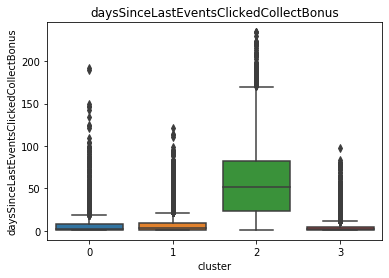


Cluster: 0
count    1746.000000
mean        9.557847
std        19.141917
min         1.000000
25%         1.000000
50%         2.000000
75%         8.000000
max       192.000000
Name: daysSinceLastEventsClickedCollectBonus, dtype: float64


Cluster: 1
count    28633.000000
mean         7.777704
std         10.604297
min          1.000000
25%          1.000000
50%          3.000000
75%          9.000000
max        121.000000
Name: daysSinceLastEventsClickedCollectBonus, dtype: float64


Cluster: 2
count    4697.000000
mean       57.862891
std        43.510479
min         1.000000
25%        23.000000
50%        52.000000
75%        82.000000
max       234.000000
Name: daysSinceLastEventsClickedCollectBonus, dtype: float64


Cluster: 3
count    10877.000000
mean         5.320493
std          8.560081
min          1.000000
25%          1.000000
50%          2.000000
75%          5.000000
max         98.000000
Name: daysSinceLastEventsClickedCollectBonus, dtype: float64



In [97]:
for f in features:
    print('--------------------------------------------')
    print('Feature: ' + f)
    print()
    # Create box plot with Seaborn's default settings
    _ = sns.boxplot(x='cluster', y=f, data=ufinal)
    
    # Label the axes
    _ = plt.xlabel('cluster')
    _ = plt.title(f)
    
    # Show the plot
    plt.show()
    
    for c in range(4):
        print()
        print('Cluster: ' + str(c))
        print(ufinal[ufinal.cluster == c][f].describe())
        print()


Cluster: 0



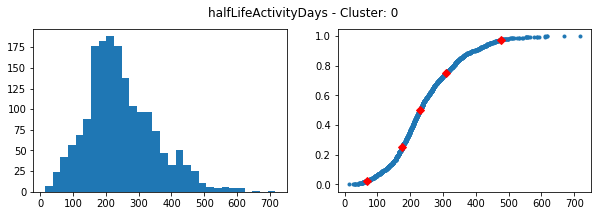

count    1746.000000
mean      246.060137
std       104.858515
min        14.000000
25%       176.000000
50%       229.500000
75%       308.750000
max       717.000000
Name: halfLifeActivityDays, dtype: float64


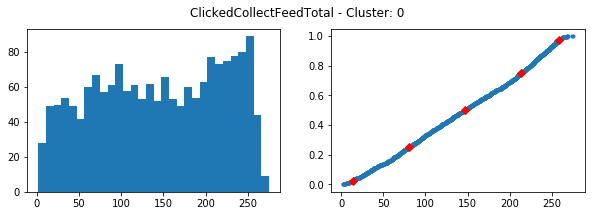

count    1746.000000
mean      144.494273
std        75.229873
min         2.000000
25%        80.250000
50%       147.000000
75%       213.000000
max       275.000000
Name: ClickedCollectFeedTotal, dtype: float64


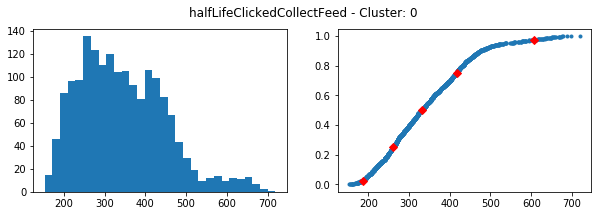

count    1746.000000
mean      344.058419
std       106.332802
min       153.000000
25%       261.000000
50%       331.000000
75%       417.000000
max       719.000000
Name: halfLifeClickedCollectFeed, dtype: float64


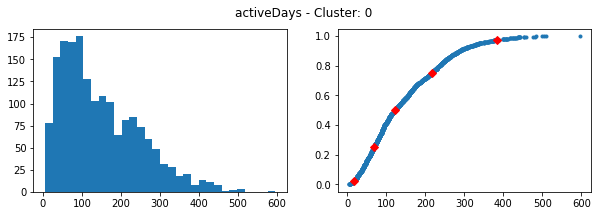

count    1746.000000
mean      147.660939
std       100.405982
min         5.000000
25%        68.000000
50%       123.000000
75%       217.000000
max       596.000000
Name: activeDays, dtype: float64


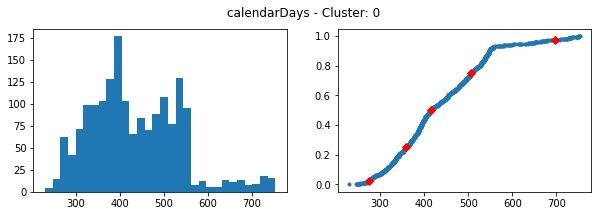

count    1746.000000
mean      435.209049
std       102.593355
min       230.000000
25%       359.250000
50%       416.000000
75%       507.000000
max       753.000000
Name: calendarDays, dtype: float64


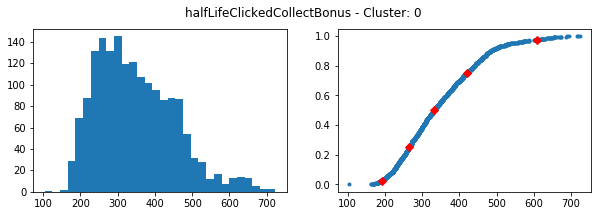

count    1746.000000
mean      348.630011
std       106.115893
min       104.000000
25%       265.000000
50%       332.000000
75%       421.750000
max       723.000000
Name: halfLifeClickedCollectBonus, dtype: float64


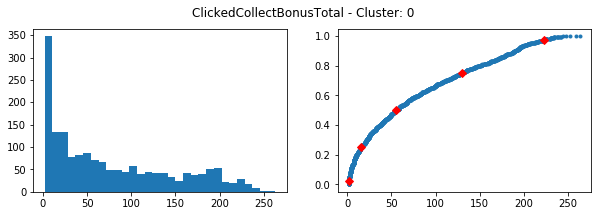

count    1746.000000
mean       77.541810
std        69.450539
min         2.000000
25%        15.250000
50%        55.500000
75%       130.000000
max       263.000000
Name: ClickedCollectBonusTotal, dtype: float64


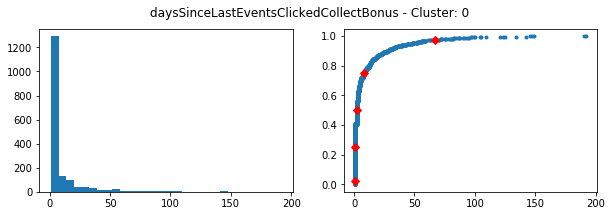

count    1746.000000
mean        9.557847
std        19.141917
min         1.000000
25%         1.000000
50%         2.000000
75%         8.000000
max       192.000000
Name: daysSinceLastEventsClickedCollectBonus, dtype: float64


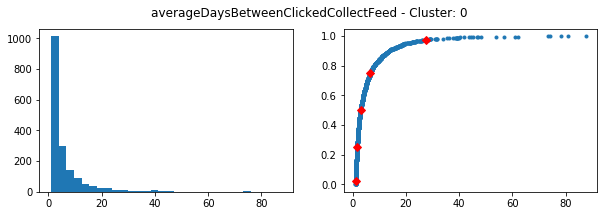

count    1746.000000
mean        5.987438
std         8.120796
min         1.000000
25%         1.720147
50%         3.006173
75%         6.696078
max        87.500000
Name: averageDaysBetweenClickedCollectFeed, dtype: float64


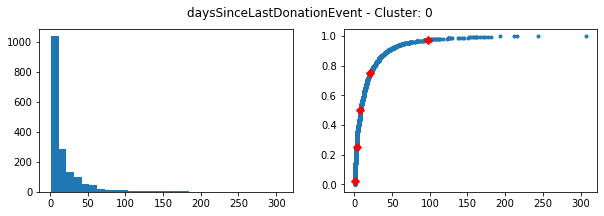

count    1746.000000
mean       17.904353
std        27.560229
min         1.000000
25%         3.000000
50%         8.000000
75%        21.000000
max       307.000000
Name: daysSinceLastDonationEvent, dtype: float64


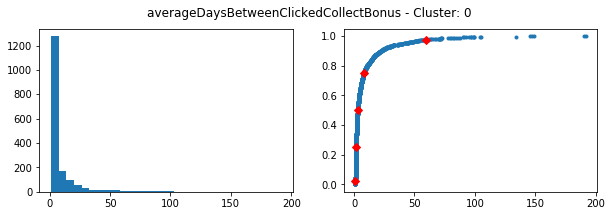

count    1746.000000
mean        9.098179
std        17.010575
min         1.000000
25%         1.586429
50%         3.006098
75%         7.885417
max       192.000000
Name: averageDaysBetweenClickedCollectBonus, dtype: float64


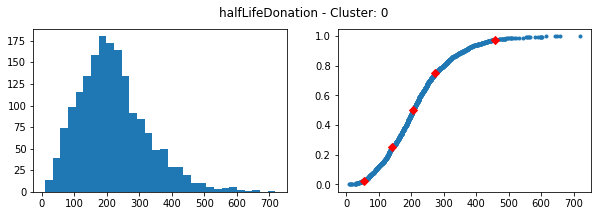

count    1746.000000
mean      218.447308
std       105.705965
min         9.000000
25%       142.250000
50%       205.500000
75%       273.000000
max       719.000000
Name: halfLifeDonation, dtype: float64


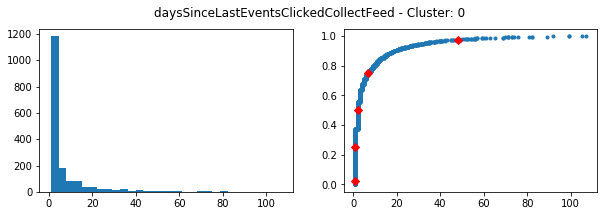

count    1746.000000
mean        7.174112
std        12.724209
min         1.000000
25%         1.000000
50%         2.000000
75%         7.000000
max       107.000000
Name: daysSinceLastEventsClickedCollectFeed, dtype: float64


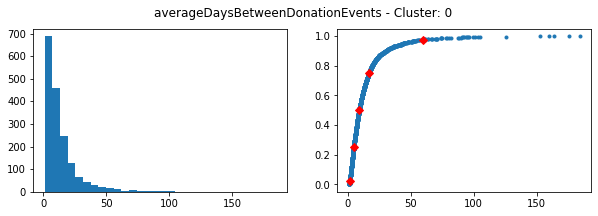

count    1746.000000
mean       14.211123
std        16.905035
min         1.000000
25%         4.776891
50%         9.022774
75%        16.880533
max       184.000000
Name: averageDaysBetweenDonationEvents, dtype: float64


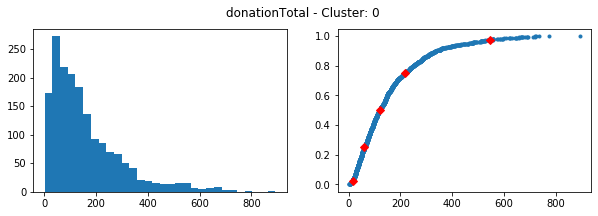

count    1746.000000
mean      160.601947
std       137.581522
min         2.000000
25%        60.000000
50%       121.000000
75%       216.000000
max       892.000000
Name: donationTotal, dtype: float64


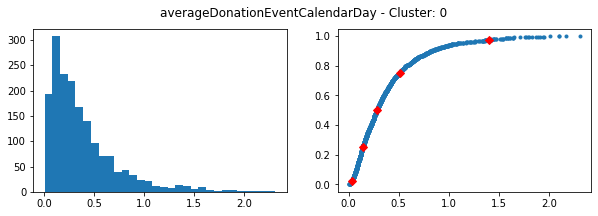

count    1746.000000
mean        0.385126
std         0.347821
min         0.005277
25%         0.140486
50%         0.283326
75%         0.509896
max         2.309353
Name: averageDonationEventCalendarDay, dtype: float64


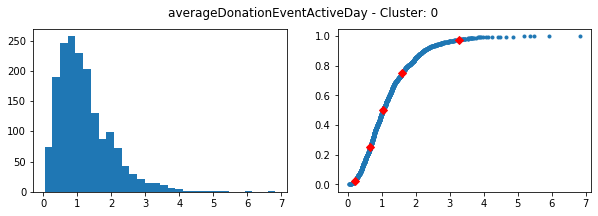

count    1746.000000
mean        1.220308
std         0.795712
min         0.044335
25%         0.666667
50%         1.040690
75%         1.604128
max         6.819444
Name: averageDonationEventActiveDay, dtype: float64

Cluster: 1



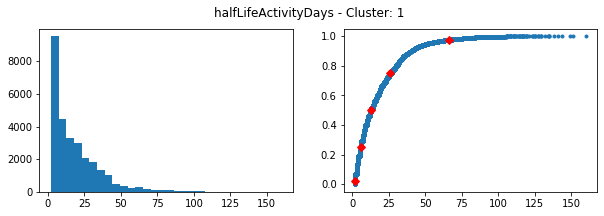

count    28633.000000
mean        18.467572
std         17.469790
min          2.000000
25%          6.000000
50%         13.000000
75%         26.000000
max        160.000000
Name: halfLifeActivityDays, dtype: float64


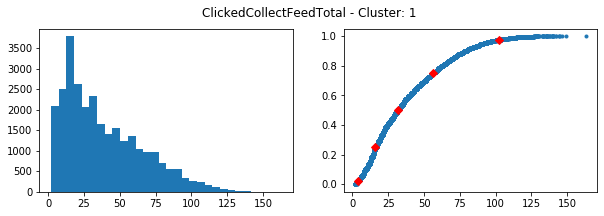

count    28633.000000
mean        38.644501
std         27.307307
min          2.000000
25%         16.000000
50%         32.000000
75%         56.000000
max        163.000000
Name: ClickedCollectFeedTotal, dtype: float64


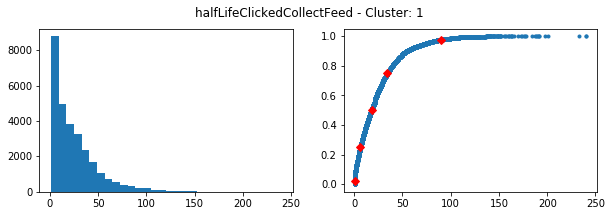

count    28633.000000
mean        24.355080
std         24.005179
min          1.000000
25%          6.000000
50%         18.000000
75%         34.000000
max        240.000000
Name: halfLifeClickedCollectFeed, dtype: float64


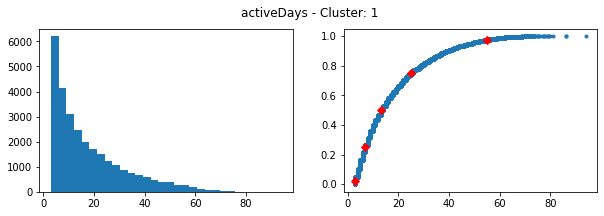

count    28633.000000
mean        18.172982
std         14.296471
min          3.000000
25%          7.000000
50%         13.000000
75%         25.000000
max         94.000000
Name: activeDays, dtype: float64


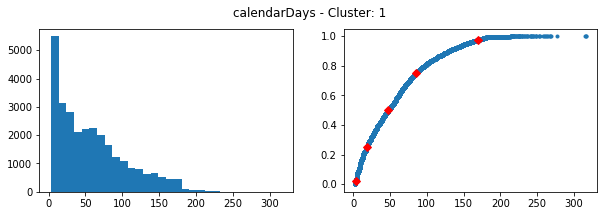

count    28633.000000
mean        58.625991
std         47.273300
min          3.000000
25%         19.000000
50%         48.000000
75%         85.000000
max        316.000000
Name: calendarDays, dtype: float64


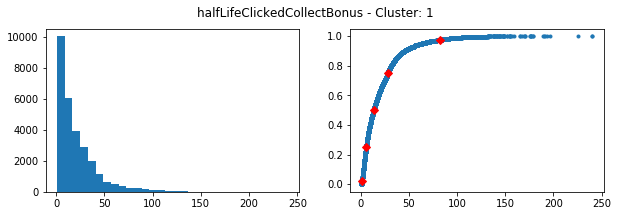

count    28633.000000
mean        20.744072
std         21.300492
min          1.000000
25%          6.000000
50%         14.000000
75%         28.000000
max        240.000000
Name: halfLifeClickedCollectBonus, dtype: float64


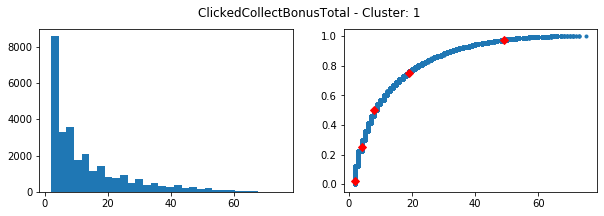

count    28633.000000
mean        13.396221
std         12.918036
min          2.000000
25%          4.000000
50%          8.000000
75%         19.000000
max         75.000000
Name: ClickedCollectBonusTotal, dtype: float64


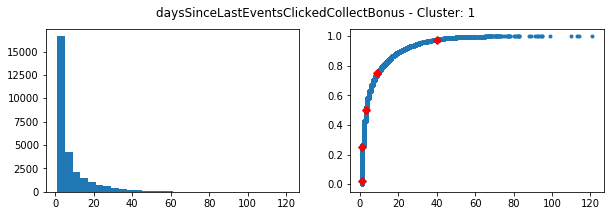

count    28633.000000
mean         7.777704
std         10.604297
min          1.000000
25%          1.000000
50%          3.000000
75%          9.000000
max        121.000000
Name: daysSinceLastEventsClickedCollectBonus, dtype: float64


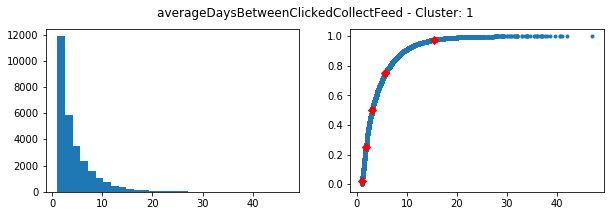

count    28633.000000
mean         4.505386
std          4.020786
min          1.000000
25%          1.857143
50%          3.000000
75%          5.750000
max         47.000000
Name: averageDaysBetweenClickedCollectFeed, dtype: float64


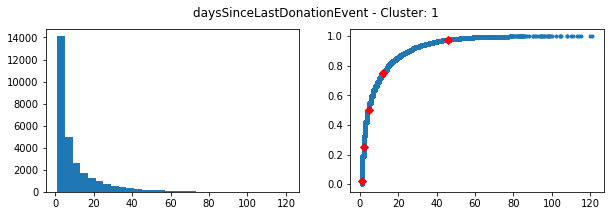

count    28633.000000
mean         9.607167
std         12.385417
min          1.000000
25%          2.000000
50%          5.000000
75%         12.000000
max        121.000000
Name: daysSinceLastDonationEvent, dtype: float64


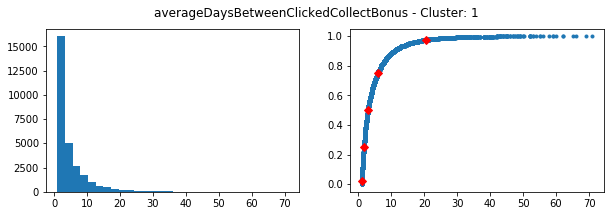

count    28633.000000
mean         4.916589
std          5.610998
min          1.000000
25%          1.666667
50%          3.000000
75%          6.000000
max         71.000000
Name: averageDaysBetweenClickedCollectBonus, dtype: float64


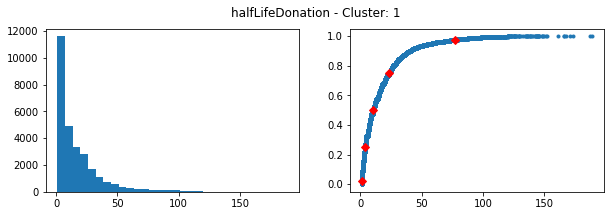

count    28633.000000
mean        17.286313
std         19.866009
min          1.000000
25%          4.000000
50%         10.000000
75%         23.000000
max        189.000000
Name: halfLifeDonation, dtype: float64


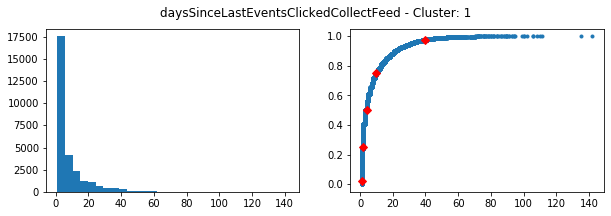

count    28633.000000
mean         8.134146
std         10.980029
min          1.000000
25%          2.000000
50%          4.000000
75%         10.000000
max        142.000000
Name: daysSinceLastEventsClickedCollectFeed, dtype: float64


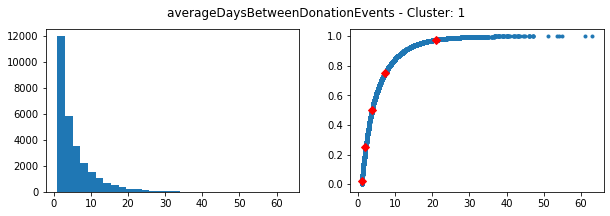

count    28633.000000
mean         5.702580
std          5.485023
min          1.000000
25%          2.000000
50%          3.800000
75%          7.285714
max         63.000000
Name: averageDaysBetweenDonationEvents, dtype: float64


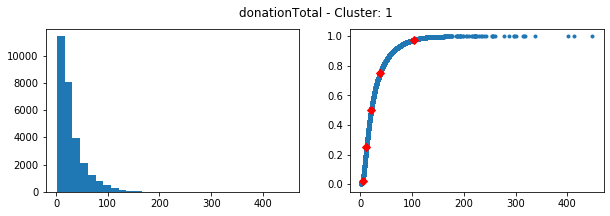

count    28633.000000
mean        29.353194
std         27.145426
min          2.000000
25%         11.000000
50%         21.000000
75%         38.000000
max        448.000000
Name: donationTotal, dtype: float64


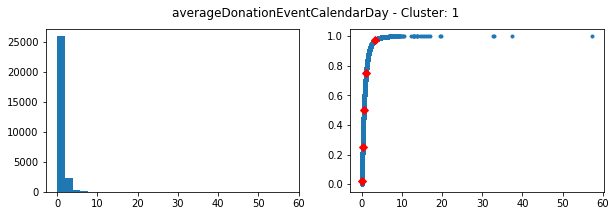

count    28633.000000
mean         0.866954
std          1.089429
min          0.010753
25%          0.268817
50%          0.555556
75%          1.111111
max         57.333333
Name: averageDonationEventCalendarDay, dtype: float64


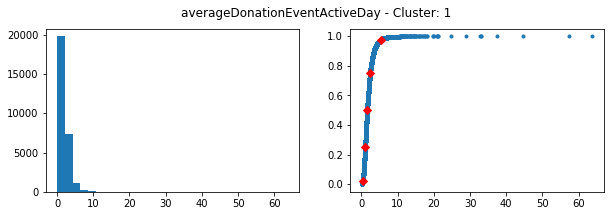

count    28633.000000
mean         1.920745
std          1.563331
min          0.039216
25%          1.000000
50%          1.590909
75%          2.400000
max         63.750000
Name: averageDonationEventActiveDay, dtype: float64

Cluster: 2



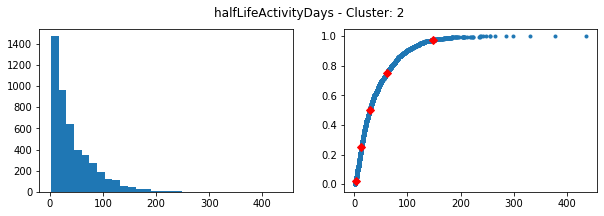

count    4697.000000
mean       42.933575
std        41.067763
min         2.000000
25%        13.000000
50%        29.000000
75%        61.000000
max       436.000000
Name: halfLifeActivityDays, dtype: float64


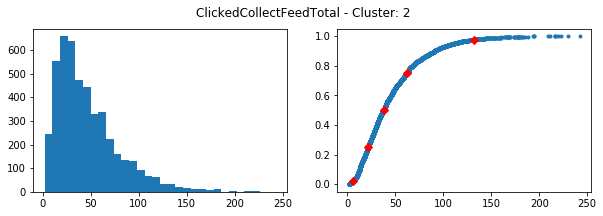

count    4697.000000
mean       46.147967
std        33.189451
min         2.000000
25%        22.000000
50%        38.000000
75%        62.000000
max       242.000000
Name: ClickedCollectFeedTotal, dtype: float64


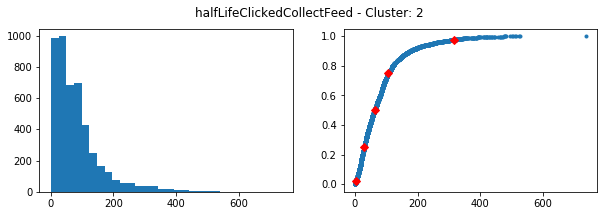

count    4697.000000
mean       83.484990
std        78.617861
min         1.000000
25%        29.000000
50%        63.000000
75%       107.000000
max       737.000000
Name: halfLifeClickedCollectFeed, dtype: float64


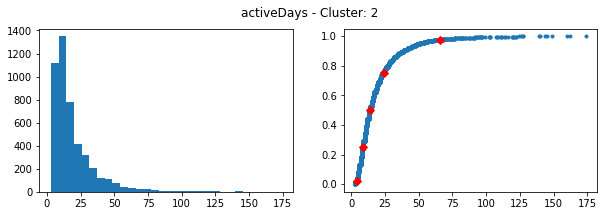

count    4697.000000
mean       19.177560
std        17.060806
min         3.000000
25%         9.000000
50%        14.000000
75%        24.000000
max       174.000000
Name: activeDays, dtype: float64


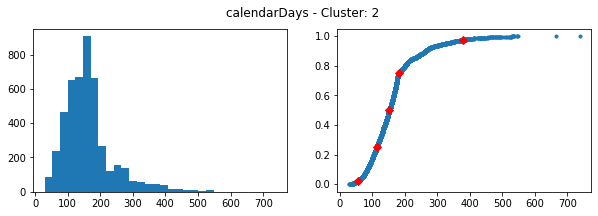

count    4697.000000
mean      164.319353
std        78.405662
min        29.000000
25%       114.000000
50%       153.000000
75%       183.000000
max       737.000000
Name: calendarDays, dtype: float64


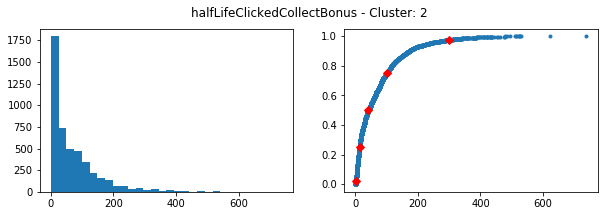

count    4697.000000
mean       71.640835
std        81.050389
min         1.000000
25%        14.000000
50%        42.000000
75%       101.000000
max       737.000000
Name: halfLifeClickedCollectBonus, dtype: float64


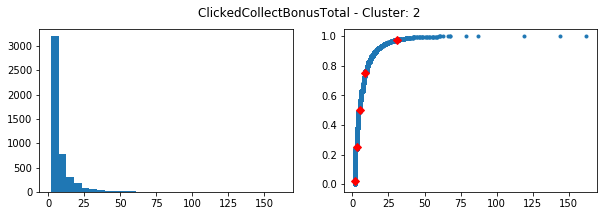

count    4697.000000
mean        7.556951
std         8.702457
min         2.000000
25%         3.000000
50%         5.000000
75%         9.000000
max       162.000000
Name: ClickedCollectBonusTotal, dtype: float64


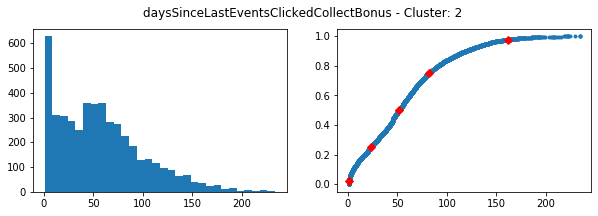

count    4697.000000
mean       57.862891
std        43.510479
min         1.000000
25%        23.000000
50%        52.000000
75%        82.000000
max       234.000000
Name: daysSinceLastEventsClickedCollectBonus, dtype: float64


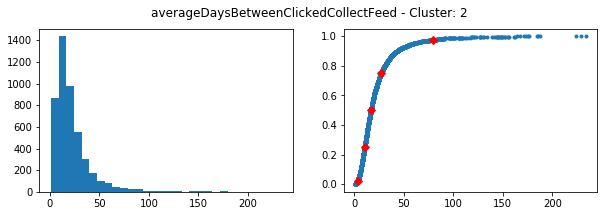

count    4697.000000
mean       22.553108
std        21.155896
min         1.000000
25%        10.272727
50%        16.833333
75%        27.166667
max       234.000000
Name: averageDaysBetweenClickedCollectFeed, dtype: float64


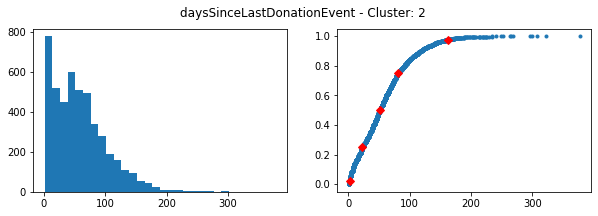

count    4697.000000
mean       58.307004
std        44.122403
min         1.000000
25%        23.000000
50%        52.000000
75%        81.000000
max       377.000000
Name: daysSinceLastDonationEvent, dtype: float64


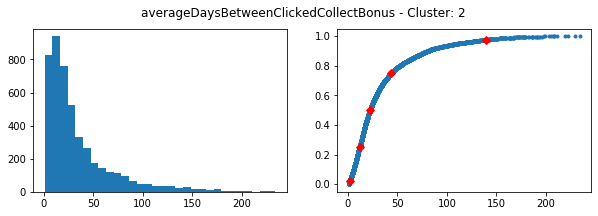

count    4697.000000
mean       34.460935
std        35.087493
min         1.000000
25%        11.727273
50%        22.200000
75%        43.666667
max       234.000000
Name: averageDaysBetweenClickedCollectBonus, dtype: float64


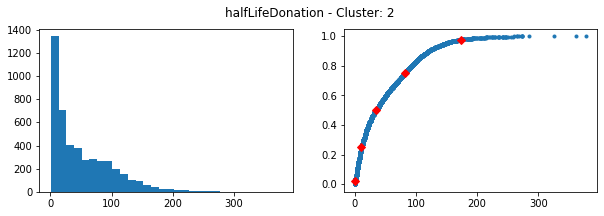

count    4697.000000
mean       51.747498
std        50.117967
min         1.000000
25%        11.000000
50%        35.000000
75%        82.000000
max       378.000000
Name: halfLifeDonation, dtype: float64


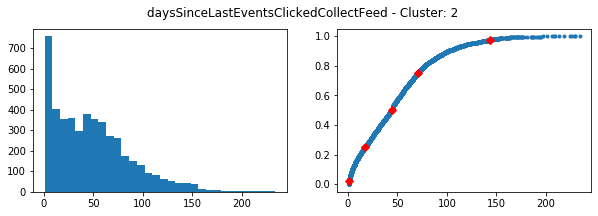

count    4697.000000
mean       49.007664
std        38.841846
min         1.000000
25%        17.000000
50%        44.000000
75%        71.000000
max       234.000000
Name: daysSinceLastEventsClickedCollectFeed, dtype: float64


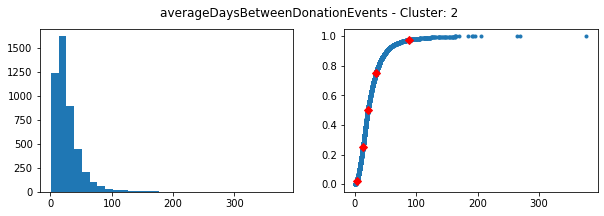

count    4697.000000
mean       27.320700
std        23.615313
min         1.000000
25%        13.000000
50%        21.333333
75%        34.400000
max       377.000000
Name: averageDaysBetweenDonationEvents, dtype: float64


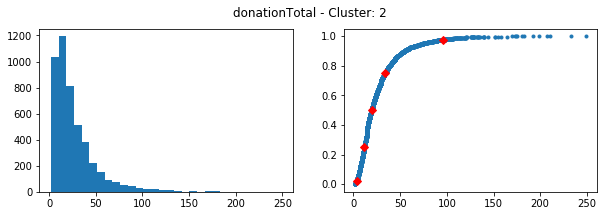

count    4697.000000
mean       26.827337
std        24.152364
min         2.000000
25%        11.000000
50%        20.000000
75%        34.000000
max       249.000000
Name: donationTotal, dtype: float64


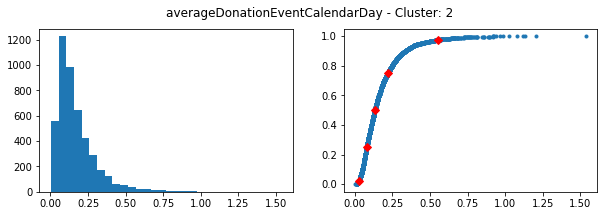

count    4697.000000
mean        0.171571
std         0.138821
min         0.003670
25%         0.078947
50%         0.132558
75%         0.219780
max         1.537037
Name: averageDonationEventCalendarDay, dtype: float64


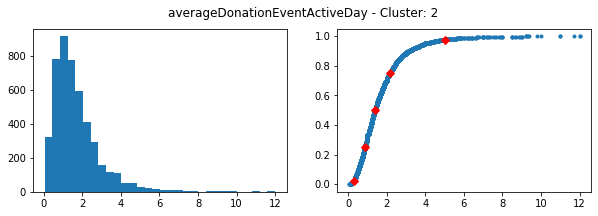

count    4697.000000
mean        1.700518
std         1.265596
min         0.040984
25%         0.869565
50%         1.400000
75%         2.166667
max        12.000000
Name: averageDonationEventActiveDay, dtype: float64

Cluster: 3



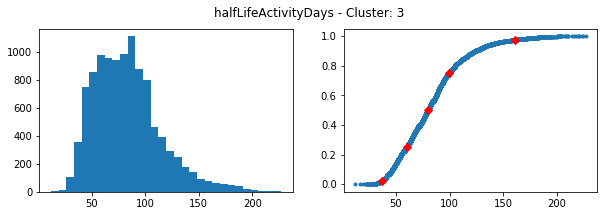

count    10877.000000
mean        83.061782
std         31.342712
min         12.000000
25%         60.000000
50%         80.000000
75%         99.000000
max        227.000000
Name: halfLifeActivityDays, dtype: float64


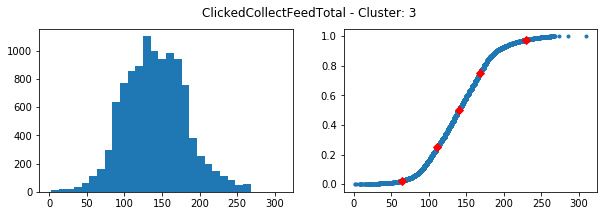

count    10877.000000
mean       140.804450
std         41.187375
min          2.000000
25%        111.000000
50%        140.000000
75%        168.000000
max        309.000000
Name: ClickedCollectFeedTotal, dtype: float64


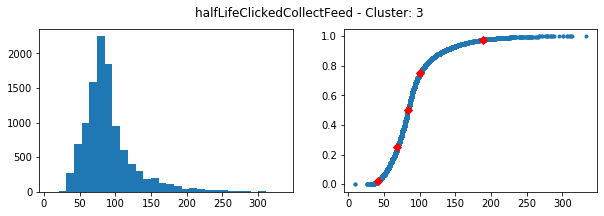

count    10877.000000
mean        90.529006
std         35.694211
min         10.000000
25%         69.000000
50%         84.000000
75%        101.000000
max        333.000000
Name: halfLifeClickedCollectFeed, dtype: float64


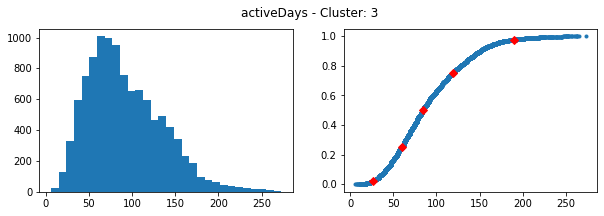

count    10877.000000
mean        91.802427
std         42.958982
min          6.000000
25%         60.000000
50%         84.000000
75%        119.000000
max        273.000000
Name: activeDays, dtype: float64


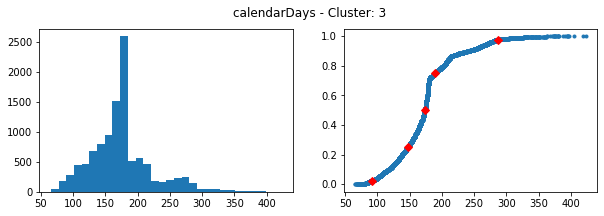

count    10877.000000
mean       174.665441
std         47.556692
min         66.000000
25%        147.000000
50%        174.000000
75%        190.000000
max        423.000000
Name: calendarDays, dtype: float64


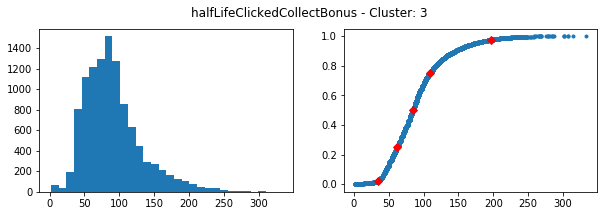

count    10877.000000
mean        90.849683
std         41.127775
min          2.000000
25%         62.000000
50%         85.000000
75%        109.000000
max        333.000000
Name: halfLifeClickedCollectBonus, dtype: float64


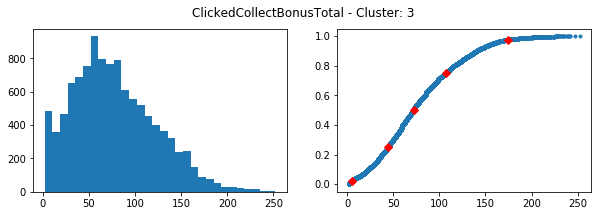

count    10877.000000
mean        77.643928
std         44.807286
min          2.000000
25%         44.000000
50%         72.000000
75%        107.000000
max        252.000000
Name: ClickedCollectBonusTotal, dtype: float64


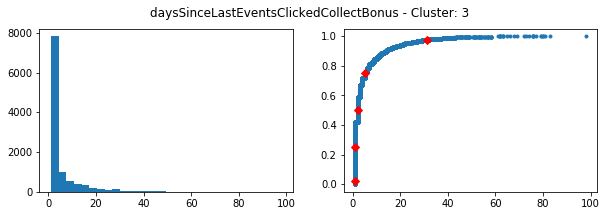

count    10877.000000
mean         5.320493
std          8.560081
min          1.000000
25%          1.000000
50%          2.000000
75%          5.000000
max         98.000000
Name: daysSinceLastEventsClickedCollectBonus, dtype: float64


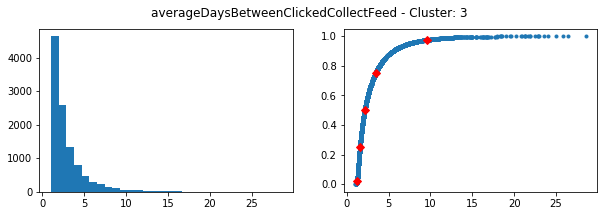

count    10877.000000
mean         2.965914
std          2.354842
min          1.000000
25%          1.560976
50%          2.135593
75%          3.431373
max         28.571429
Name: averageDaysBetweenClickedCollectFeed, dtype: float64


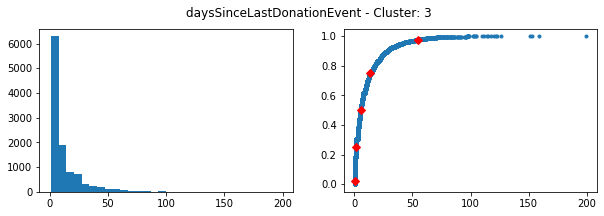

count    10877.000000
mean        11.213018
std         14.755496
min          1.000000
25%          2.000000
50%          6.000000
75%         14.000000
max        199.000000
Name: daysSinceLastDonationEvent, dtype: float64


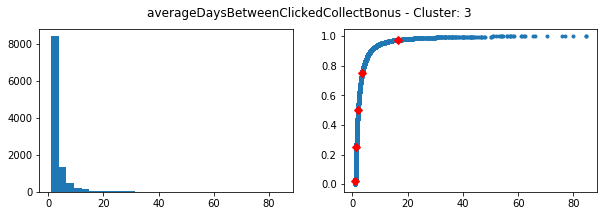

count    10877.000000
mean         3.581770
std          5.350708
min          1.000000
25%          1.421053
50%          2.012987
75%          3.500000
max         84.500000
Name: averageDaysBetweenClickedCollectBonus, dtype: float64


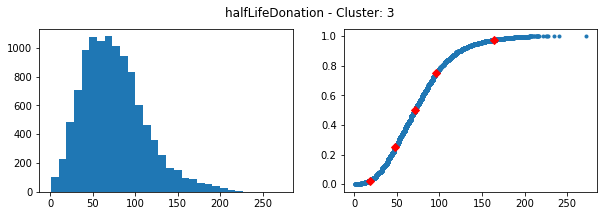

count    10877.000000
mean        75.519169
std         36.956053
min          1.000000
25%         48.000000
50%         71.000000
75%         96.000000
max        272.000000
Name: halfLifeDonation, dtype: float64


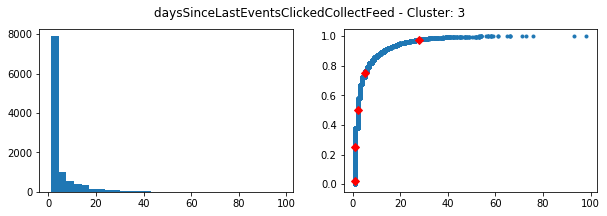

count    10877.000000
mean         4.971316
std          7.493463
min          1.000000
25%          1.000000
50%          2.000000
75%          5.000000
max         98.000000
Name: daysSinceLastEventsClickedCollectFeed, dtype: float64


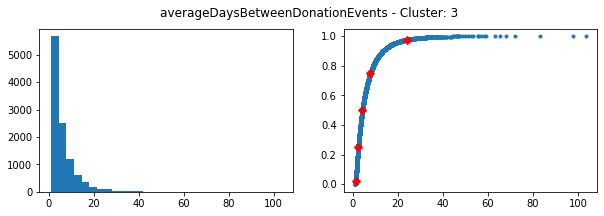

count    10877.000000
mean         6.293499
std          6.367722
min          1.000000
25%          2.358025
50%          4.214286
75%          7.777778
max        103.500000
Name: averageDaysBetweenDonationEvents, dtype: float64


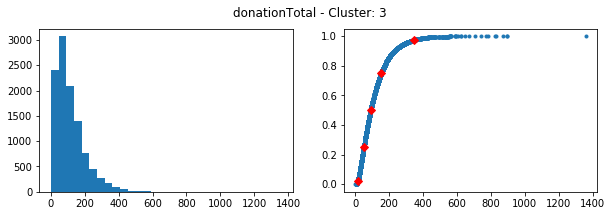

count    10877.000000
mean       116.098740
std         90.888375
min          2.000000
25%         52.000000
50%         92.000000
75%        155.000000
max       1360.000000
Name: donationTotal, dtype: float64


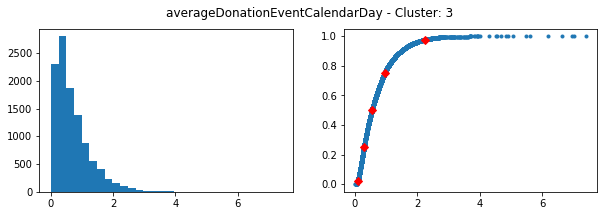

count    10877.000000
mean         0.712446
std          0.592342
min          0.014815
25%          0.290780
50%          0.544944
75%          0.957576
max          7.400000
Name: averageDonationEventCalendarDay, dtype: float64


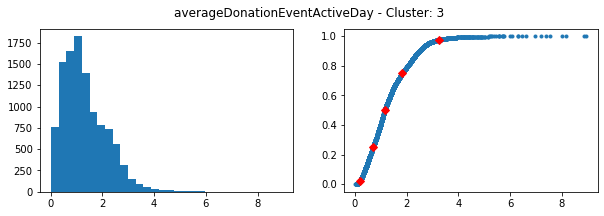

count    10877.000000
mean         1.336803
std          0.858151
min          0.022222
25%          0.697872
50%          1.156863
75%          1.828571
max          8.931034
Name: averageDonationEventActiveDay, dtype: float64


In [100]:
for c in range(4):
    print()
    print('Cluster: ' + str(c))
    print()
    
    for f in importances.sort_values(ascending=False).index:   
        dados = ufinal[ufinal.cluster == c][f]
        
        # Generate subplot
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,3))
        _ = fig.suptitle(f + ' - Cluster: ' + str(c))
        
        # Plot histogram
        _ = ax1.hist(dados, bins=30)
        
        # Compute ECDF for versicolor data: x_vers, y_vers
        x_vers, y_vers = ecdf(dados)
        
        # Compute percentiles: ptiles_vers
        ptiles_vers = np.percentile(dados, percentiles)
        
        # Plot the ECDF
        _ = ax2.plot(x_vers, y_vers, '.')
        
        # Overlay percentiles as red diamonds.
        ptiles = [x/100 for x in percentiles]
        _ = ax2.plot(ptiles_vers, ptiles, marker='D', color='red', linestyle='none')
        
        plt.show()
        print(dados.describe())

In [103]:
for c in range(4):
    print('-------------------------')
    print('Cluster: ' + str(c))
    print()
    
    for f in importances.sort_values(ascending=False).index:
        print()
        print('Feature: ' + f)
        print(ufinal[ufinal.cluster == c][f].mean())
        print()

-------------------------
Cluster: 0


Feature: halfLifeActivityDays
246.06013745704468


Feature: ClickedCollectFeedTotal
144.4942726231386


Feature: halfLifeClickedCollectFeed
344.05841924398624


Feature: activeDays
147.66093928980527


Feature: calendarDays
435.209049255441


Feature: halfLifeClickedCollectBonus
348.63001145475374


Feature: ClickedCollectBonusTotal
77.5418098510882


Feature: daysSinceLastEventsClickedCollectBonus
9.557846506300114


Feature: averageDaysBetweenClickedCollectFeed
5.9874382951870535


Feature: daysSinceLastDonationEvent
17.90435280641466


Feature: averageDaysBetweenClickedCollectBonus
9.098179363365112


Feature: halfLifeDonation
218.44730813287515


Feature: daysSinceLastEventsClickedCollectFeed
7.174112256586484


Feature: averageDaysBetweenDonationEvents
14.211123463506103


Feature: donationTotal
160.60194730813288


Feature: averageDonationEventCalendarDay
0.3851260730391081


Feature: averageDonationEventActiveDay
1.220308281173679

--------

In [107]:
ufinal.userId

AttributeError: 'DataFrame' object has no attribute 'userId'

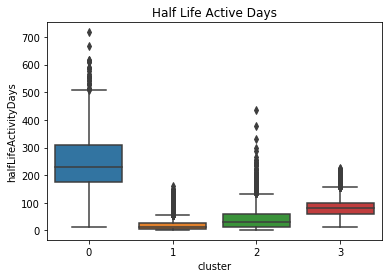

In [58]:
# Making a box plot for the petal lengths is unnecessary
# because the iris data set is not too large and the bee swarm plot works fine. 

# Create box plot with Seaborn's default settings
_ = sns.boxplot(x='cluster', y='halfLifeActivityDays', data=ufinal)

# Label the axes
_ = plt.xlabel('cluster')
_ = plt.title('Half Life Active Days')

# Show the plot
plt.show()

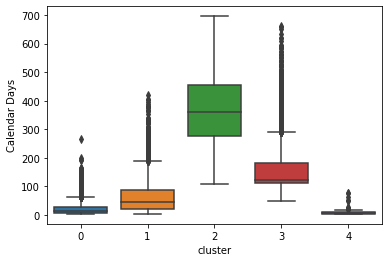

In [34]:
# Making a box plot for the petal lengths is unnecessary
# because the iris data set is not too large and the bee swarm plot works fine. 

# Create box plot with Seaborn's default settings
_ = sns.boxplot(x='cluster', y='calendarDays', data=ufinal)

# Label the axes
_ = plt.xlabel('cluster')
_ = plt.ylabel('Calendar Days')

# Show the plot
plt.show()

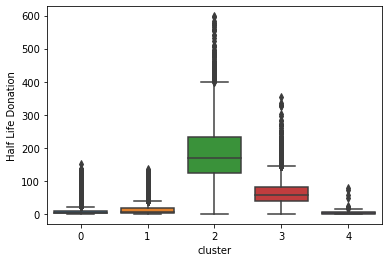

In [35]:
# Making a box plot for the petal lengths is unnecessary
# because the iris data set is not too large and the bee swarm plot works fine. 

# Create box plot with Seaborn's default settings
_ = sns.boxplot(x='cluster', y='halfLifeDonation', data=ufinal)

# Label the axes
_ = plt.xlabel('cluster')
_ = plt.ylabel('Half Life Donation')

# Show the plot
plt.show()

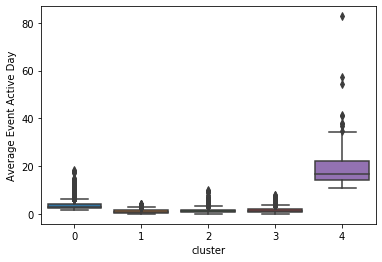

In [36]:
# Making a box plot for the petal lengths is unnecessary
# because the iris data set is not too large and the bee swarm plot works fine. 

# Create box plot with Seaborn's default settings
_ = sns.boxplot(x='cluster', y='averageEventActiveDay', data=ufinal)

# Label the axes
_ = plt.xlabel('cluster')
_ = plt.ylabel('Average Event Active Day')

# Show the plot
plt.show()

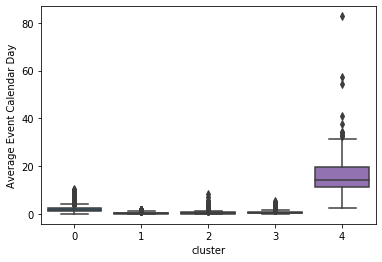

In [37]:
# Making a box plot for the petal lengths is unnecessary
# because the iris data set is not too large and the bee swarm plot works fine. 

# Create box plot with Seaborn's default settings
_ = sns.boxplot(x='cluster', y='averageEventCalendarDay', data=ufinal)

# Label the axes
_ = plt.xlabel('cluster')
_ = plt.ylabel('Average Event Calendar Day')

# Show the plot
plt.show()

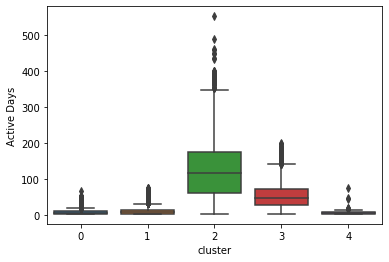

In [38]:
# Making a box plot for the petal lengths is unnecessary
# because the iris data set is not too large and the bee swarm plot works fine. 

# Create box plot with Seaborn's default settings
_ = sns.boxplot(x='cluster', y='activeDays', data=ufinal)

# Label the axes
_ = plt.xlabel('cluster')
_ = plt.ylabel('Active Days')

# Show the plot
plt.show()

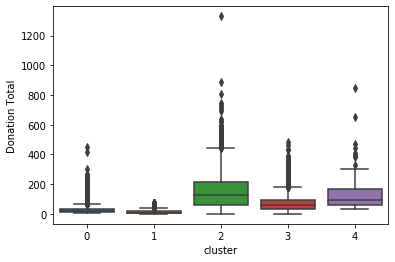

In [39]:
# Making a box plot for the petal lengths is unnecessary
# because the iris data set is not too large and the bee swarm plot works fine. 

# Create box plot with Seaborn's default settings
_ = sns.boxplot(x='cluster', y='donationTotal', data=ufinal)

# Label the axes
_ = plt.xlabel('cluster')
_ = plt.ylabel('Donation Total')

# Show the plot
plt.show()

In [40]:
clf.estimators_[5]

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=8,
                       max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=2092712569, splitter='best')

In [41]:
target_names = np.array(['cluster 0', 'cluster 1', 'cluster 2', 'cluster 3'])

In [113]:
# Train
#model.fit(iris.data, iris.target)
# Extract single tree
estimator = clf.estimators_[5]

from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = features,
                class_names = target_names,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
#call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

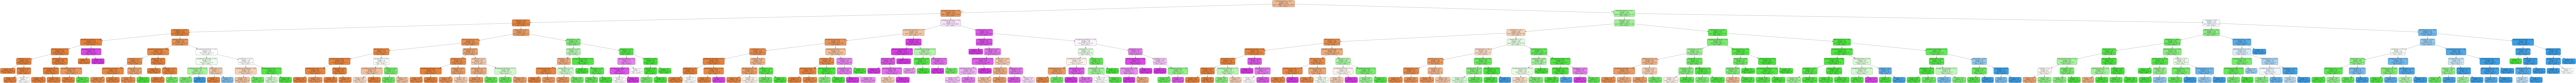

In [114]:
# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

In [124]:
clf.

AttributeError: 'RandomForestClassifier' object has no attribute 'tree_'

In [118]:
from subprocess import check_call
check_call(['dot','-Tpng','tree.dot','-o','OutputFile.png'])

0

In [108]:
ux = pd.concat([pd.DataFrame(labels).reset_index(drop=True),df.reset_index(drop=False)], axis=1)
ux.rename(columns={0: "cluster"}, inplace=True)
ux.head()

cluster  userId            deviceModel countryISO firstAccess lastAccess  \
0        0       1        Galaxy J5 Prime         BR  2017-11-07 2019-10-27   
1        0       2           Galaxy Note8         BR  2017-10-05 2019-10-20   
2        0       3                  Mi A2         BR  2017-10-06 2019-10-23   
3        0       8  Moto G Plus (5th Gen)         BR  2017-10-11 2019-08-09   
4        0       9              Galaxy S8         BR  2017-10-04 2019-10-25   

   calendarDays  activeDays  halfLifeActivityDays  donationTotal  ...  \
0           720           6                   717           17.0  ...   
1           746         193                   289          258.0  ...   
2           748         162                   372          102.0  ...   
3           668          73                   248           78.0  ...   
4           752         335                   310          246.0  ...   

   ClickedShareBadge  ReceiveBadgeButton  ReceiveBadgeClose  \
0                0.0                 3.0                2.0   
1                0.0                 7.0               13.0   
2                1.0                 5.0                9.0   
3                1.0                 5.0                5.0   
4                0.0                12.0               14.0   

   ClickedInviteFriendsBadgeScreen  ClickedToSeeReward  OpenedAdOnFeedView  \
0                              0.0                 4.0                 0.0   
1                              0.0                 0.0                 0.0   
2                              0.0                 4.0                 0.0   
3                              0.0                 2.0                 0.0   
4                              0.0                 7.0                 0.0   

   ClickedBadgesUnupdated  ClickedShareFeed  ClickedShareFeedView  \
0                     0.0               0.0                   5.0   
1                     0.0               0.0                   0.0   
2                     0.0               0.0                   0.0   
3                     0.0               0.0                   0.0   
4                     0.0               0.0                   0.0   

   OpenedProfileInfo  
0                0.0  
1                0.0  
2                7.0  
3                0.0  
4                0.0  

[5 rows x 95 columns]

In [109]:
ux.to_csv(path_csv/'users_cluster_v1.csv', index=False)